## Um dataset pequeno de grafos

Problema: definir qual a área de uma determinada publicação baseado em quais publicações ela cita.

Modelagem: Classificador multirótulo, criado com algoritmos clássicos de aprendizagem de máquina

In [ ]:
import torch
from torch_geometric.datasets import Planetoid

# Carrega o dataset Cora
dataset = Planetoid(root='/tmp/Cora', name='Cora')

# Obtém os rótulos do dataset
labels = dataset[0].y # type: ignore

# Imprime informações sobre os rótulos
print(f'Número de classes: {dataset.num_classes}')
print(f'Rótulos únicos: {labels.unique()}')
print(f'Contagem de cada rótulo:\n{torch.bincount(labels)}')

Número de classes: 7
Rótulos únicos: tensor([0, 1, 2, 3, 4, 5, 6])
Contagem de cada rótulo:
tensor([351, 217, 418, 818, 426, 298, 180])


In [2]:
labels

tensor([3, 4, 4,  ..., 3, 3, 3])

Observação: 

Apesar do nome "Regressão Logística", esse algoritmo é na verdade um algoritmo de classificação, e não de regressão.

A Regressão Linear é usada para prever valores contínuos, enquanto a Regressão Logística prevê a probabilidade de um dado exemplo pertencer a uma determinada classe. No nosso caso, estamos prevendo se um objeto celeste é um planeta ou não, que é um problema de classificação.

A Regressão Logística usa uma função (a função sigmóide) para transformar a saída da regressão linear em uma probabilidade entre 0 e 1. Essa probabilidade é então usada para classificar o exemplo.

Em resumo, a Regressão Logística usa a regressão linear como base, mas a utiliza para resolver problemas de classificação.

## Aprendizagem supervisionada com algoritmos clássicos

In [ ]:
import torch
import plotly.graph_objects as go
import plotly.figure_factory as ff

from torch_geometric.datasets import Planetoid
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Criar função para plotar a matriz de confusão para visualizar a qualidade da classificação
def plot_matriz_confusao_sete_classes(y_test, y_pred):
    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)

    # Calcular a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Criar a figura com Plotly, definindo 7 rótulos para o eixo x
    fig = ff.create_annotated_heatmap(
        z=cm,  # Dados da matriz de confusão
        x=['Classe 0', 'Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5', 'Classe 6'],  # Rótulos do eixo x
        y=['Classe 0', 'Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5', 'Classe 6'],  # Rótulos do eixo y
        annotation_text=cm,  # Mostrar os valores na matriz
        colorscale='Blues',  # Escolher a escala de cores
        showscale=True  # Mostrar a barra de cores
    )

    # Configurar o layout
    fig.update_layout(
        title='Matriz de Confusão',
        xaxis_title='Previsão',
        yaxis_title='Valor Real'
    )

    fig.show()

# Criar função para calcular a acurácia de classificação para cada classe
def plotar_acuracia_por_classe(y_true, y_pred, labels):
    """
    Plota um gráfico de barras com a acurácia para cada classe.

    Args:
        y_true: Os rótulos verdadeiros.
        y_pred: As previsões do modelo.
        labels: Uma lista com os nomes das classes.
    """

    # Calcula a matriz de confusão
    cm = confusion_matrix(y_true, y_pred)

    # Extrai os verdadeiros positivos (TP) e falsos positivos (FP)
    TP = cm.diagonal()
    FP = cm.sum(axis=0) - TP

    # Calcula a acurácia para cada classe, evitando divisão por zero
    acuracia_por_classe = []
    for tp, fp in zip(TP, FP):
        if tp + fp == 0:
            acuracia_por_classe.append(0)  # Define acurácia como 0 se não houver previsões positivas para a classe
        else:
            acuracia_por_classe.append(tp / (tp + fp))

    # Calcular a acurácia
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Acurácia {accuracy}")

    # Formata a acurácia em percentual
    acuracia_percentual = [f'{acc:.0%}' for acc in acuracia_por_classe]

    # Cria o gráfico de barras com os rótulos de dados
    fig = go.Figure(data=[go.Bar(
        x=labels,
        y=acuracia_por_classe,
        text=acuracia_percentual,  # Adiciona os rótulos de dados
        textposition='outside'  # Posiciona os rótulos fora das barras
    )])

    # Adicionar linha horizontal tracejada com a acurácia média
    fig.add_shape(
        type='line',
        x0=-0.5,
        x1=len(labels) - 0.5,
        y0=accuracy,
        y1=accuracy,
        line=dict(color='red', dash='dash')
    )

    # Adicionar anotação com o valor da acurácia
    fig.add_annotation(
        x=len(labels) - 0.3,  # Posição x da anotação (extremidade direita da linha)
        y=accuracy,  # Posição y da anotação (mesma da linha)
        text=f'{accuracy:.2%}',  # Texto da anotação (acurácia formatada)
        showarrow=False,  # Não mostra a seta da anotação
        yshift=10,  # Desloca a anotação um pouco para cima
        font=dict(  # Define a fonte da anotação
            color='red',  # Cor da fonte igual à da linha
            size=18  # Tamanho da fonte duas vezes maior (ajuste conforme necessário)
        )        
    )

    # Configurar o layout do gráfico
    fig.update_layout(
        title='Acurácia por Classe',
        xaxis_title='Classe',
        yaxis_title='Acurácia',
        yaxis_tickformat='.0%'  # Formatar o eixo y em percentual
    )

    fig.show()

In [ ]:
# Carregar o dataset Cora
dataset = Planetoid(root='/tmp/Cora', name='Cora')

# Obter os rótulos do dataset
labels = dataset[0].y # type: ignore

# Imprimir informações sobre os rótulos
print(f'Informações sobre o conjunto de dados em análise:')
print(f'  Número de classes: {dataset.num_classes}')
print(f'  Rótulos únicos: {labels.unique()}')
print(f'  Contagem de ocorrências por rótulo: {torch.bincount(labels)}')

# Carregar o dataset Planetoid (cora, citeseer ou pubmed)
dataset = Planetoid(root='/tmp/Cora', name='Cora') 

# Obter os dados do grafo
data = dataset[0]

# Separar as características (X) e os rótulos (y)
X = data.x.numpy() # type: ignore
y = data.y.numpy() # type: ignore

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)  # Aumentamos o número máximo de iterações

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)

Informações sobre o conjunto de dados em análise:
  Número de classes: 7
  Rótulos únicos: tensor([0, 1, 2, 3, 4, 5, 6])
  Contagem de ocorrências por rótulo: tensor([351, 217, 418, 818, 426, 298, 180])


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from sklearn.model_selection import train_test_split

# Força o uso da CPU
device = torch.device('cpu')

# Carrega o dataset Cora
dataset = Planetoid(root='/tmp/Cora', name='Cora')

# Move os dados para a CPU
data = dataset[0].to(device) # type: ignore

# Separe as características (X) e os rótulos (y)
X = data.x.numpy()
y = data.y.numpy()

# Divida os dados em conjuntos de treinamento, validação e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Imprime as dimensões dos conjuntos de dados
print("Dimensões dos conjuntos de dados:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"  X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f" X_test: {X_test.shape}, y_test: {y_test.shape}")

# Função para treinar e avaliar o modelo
def train_and_evaluate(model, optimizer, X_train, y_train, X_val, y_val, X_test, y_test, epochs):
    """
    Treina e avalia o modelo, armazenando as métricas de perda e acurácia.

    Args:
        model: O modelo a ser treinado.
        optimizer: O otimizador para atualizar os parâmetros do modelo.
        X_train: Os dados de treinamento.
        y_train: Os rótulos de treinamento.
        X_val: Os dados de validação.
        y_val: Os rótulos de validação.
        X_test: Os dados de teste.
        y_test: Os rótulos de teste.
        epochs: O número de épocas para treinar.

    Returns:
        Um dicionário contendo as listas de perda e acurácia para treinamento, 
        validação e teste.
    """

    # Cria listas para armazenar as métricas
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': [],
        'test_loss': [],
        'test_acc': []
    }

    # Loop de treinamento
    for epoch in range(epochs):
        # Treinamento
        model.train()
        optimizer.zero_grad()
        
        ## Caso não puder usar tensores com o PyTorch e precisar usar apenas Numpy
        # Gerar saída em um array do Numpy
        # output = model(X_train)

        # Calcular a perda e armazenar em array Numpy
        # loss = F.nll_loss(output, y_train)
    
        ## Para usar tensores com PyTorch
        # Converter X_train para tensor PyTorch
        output = model(torch.tensor(X_train, dtype=torch.float32))  

        # Converter y_train para tensor PyTorch
        loss = F.nll_loss(output, torch.tensor(y_train, dtype=torch.long))  
 
        loss.backward()
        optimizer.step()

        # Adicionar métricas de treinamento ao histórico
        history['train_loss'].append(loss.item())
        history['train_acc'].append(accuracy_score(y_train, output.argmax(dim=1).numpy()))

        # Avaliar
        model.eval()
        with torch.no_grad():
            ## Validar
            # output_val = model(X_val)
            # Converter X_val para tensor
            output_val = model(torch.tensor(X_val, dtype=torch.float32))  
            
            # loss_val = F.nll_loss(output_val, y_val)
            loss_val = F.nll_loss(output_val, torch.tensor(y_val, dtype=torch.long))  

            history['val_loss'].append(loss_val.item())
            history['val_acc'].append(accuracy_score(y_val, output_val.argmax(dim=1).numpy()))

            ## Testar
            # output_test = model(X_test)
            output_test = model(torch.tensor(X_test, dtype=torch.float32))  
            
            # loss_test = F.nll_loss(output_test, y_test)
            loss_test = F.nll_loss(output_test, torch.tensor(y_test, dtype=torch.long))

            history['test_loss'].append(loss_test.item())
            history['test_acc'].append(accuracy_score(y_test, output_test.argmax(dim=1).numpy()))

    return history

# Definir o modelo (exemplo com modelo mais simples)
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.lin1 = torch.nn.Linear(dataset.num_node_features, 16)
        self.lin2 = torch.nn.Linear(16, dataset.num_classes)

    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = F.dropout(x, training=self.training)
        x = self.lin2(x)
        return F.log_softmax(x, dim=1)


Dimensões dos conjuntos de dados:
X_train: (1732, 1433), y_train: (1732,)
  X_val: (434, 1433), y_val: (434,)
 X_test: (542, 1433), y_test: (542,)


## Dados Tabulares vs. Grafos:

A escolha da função de perda depende mais do tipo de tarefa (classificação, regressão, etc.) e do objetivo do modelo do que do formato dos dados. Porém, embora muitas das funções de perda que discutimos (como cross-entropy e MSE) possam ser usadas em tarefas com grafos, existem algumas diferenças importantes a serem consideradas.

Quando trabalhamos com Dados Tabulares, as instâncias independentes, ou seja, cada linha na tabela representa uma instância independente, sem relação direta com outras instâncias. E as Features explícitas, ou seja, as colunas representam features explícitas e pré-definidas.

Quando trabalhamos com Grafos, as instâncias são interconectadas, os nós no grafo representam instâncias com conexões (arestas) que indicam relações entre elas, ou seja não são independentes. Portanto, a estrutura em grafos é mais complexa, a topologia do grafo em si, contém informações importantes, além das features dos nós.

## O que muda em Grafos:

### Consideração da estrutura: 

Quanto à Estrutura dos Dados, em grafos há uma estrutura relacional inerente, com nós e arestas representando entidades e suas conexões. Essa estrutura rica exige métodos específicos para extrair informações relevantes.

## Tipos de aprendizagem em grafos

Os tipos de aprendizado em Machine Learning para grafos é similar àquela para dados tabulares, com algumas nuances e adaptações às suas características e desafios específicos. As três categorias principais - aprendizado supervisionado, não supervisionado e semi-supervisionado -  se aplicam também a problemas que envolvem grafos.

Aprendizado Supervisionado em Grafos:

- Classificação de nós: O objetivo é prever a classe ou categoria de cada nó no grafo.
Exemplo: classificar usuários de uma rede social como "spam" ou "não spam".

- Classificação de grafos: O objetivo é classificar grafos inteiros em categorias.
Exemplo: classificar moléculas como "tóxicas" ou "não tóxicas".

- Predição de links: O objetivo é prever a existência ou o tipo de conexão entre dois nós.
Exemplo: recomendar conexões em uma rede social.

Aprendizado Não Supervisionado em Grafos:

- Clustering de nós: Agrupar nós similares em clusters, com base em suas características e conexões.
Exemplo: identificar comunidades em uma rede social.

- Embedding de nós: Representar nós como vetores numéricos, capturando a estrutura do grafo e as relações entre os nós.
Exemplo: usar embeddings de nós para recomendar produtos a usuários.

- Detecção de anomalias: Identificar nós ou subgrafos que se desviam do padrão normal do grafo.
Exemplo: detectar fraudes em transações financeiras representadas como um grafo.

Aprendizado Semi-Supervisionado em Grafos:

Combina dados rotulados e não rotulados para melhorar o aprendizado em grafos. É útil quando se tem poucos dados rotulados disponíveis.

Exemplo: usar poucos exemplos de usuários rotulados como "spam" e muitos usuários não rotulados para treinar um modelo de classificação de nós.
Diferenças em relação a dados tabulares:

- Relações entre instâncias: Em grafos, as instâncias (nós) estão interconectadas, e essas relações são importantes para o aprendizado.

- Estrutura do grafo: A própria estrutura do grafo contém informações relevantes, que devem ser consideradas pelos algoritmos de aprendizado.

- Propagação de informações: As GNNs usam mecanismos de propagação para agregar informações da vizinhança de cada nó, o que influencia o processo de aprendizado.

### Tarefas de Aprendizado em grafos: 

Além das tarefas tradicionais de classificação e regressão, em grafos podemos ter tarefas como:

- Classificação de Nós: Classificar os nós em diferentes categorias. Geralmente, o objetivo é prever o rótulo de um nó (ex: classificar usuários em uma rede social, artigos científicos em tópicos e áreas, etc). Funções de perda comuns incluem cross-entropy e hinge loss, mas adaptadas para considerar a estrutura do grafo.

- Classificação de Grafos: Classificar grafos inteiros em diferentes categorias. Ou seja, o objetivo é prever o rótulo de um grafo inteiro (ex: classificar moléculas como tóxicas ou não). Funções de perda podem ser baseadas em métricas de similaridade entre grafos ou em propriedades globais do grafo.

- Previsão de Links: Prever a probabilidade de existir uma conexão entre dois nós (ex: recomendar conexões em uma rede social). Funções de perda comuns incluem cross-entropy e ranking loss.

Existem tarefas específicas de grafos que exigem funções de perda adaptadas, como:

- GNNs e propagação: As Graph Neural Networks (GNNs) usam mecanismos de propagação para agregar informações da vizinhança de cada nó. A função de perda precisa ser compatível com essa propagação e considerar a interdependência entre os nós.

## Detalhes das função de perda por tipo de problemas

A escolha da função de perda certa é crucial para o sucesso do seu modelo de Machine Learning. A seguir listamos algumas funções de perda comuns e suas aplicações por tipos de problemas:

### Problemas de Classificação:

- Binary Cross-Entropy:
Similar à nll_loss, mas para problemas de classificação binária (duas classes).
Minimiza a diferença entre a probabilidade prevista e o rótulo verdadeiro (0 ou 1).

Exemplo de caso de uso: Detectar se um email é spam ou não.

- Categorical Cross-Entropy:
Generalização da Binary Cross-Entropy para múltiplas classes.
Compara a distribuição de probabilidade prevista com a distribuição real (one-hot encoded).

Exemplo de caso de uso:  Classificar imagens de animais em diferentes categorias (gato, cachorro, pássaro).

- Hinge Loss:
Usada em Support Vector Machines (SVMs).
Maximiza a margem entre as classes, penalizando previsões incorretas ou com baixa confiança.

Exemplo de caso de uso:  Classificar textos em categorias de sentimento (positivo, negativo, neutro).

### Problemas de Regressão:

- Mean Squared Error (MSE):
Calcula a média dos quadrados das diferenças entre os valores previstos e reais.
Sensível a outliers (valores extremos).

Exemplo de caso de uso:  Prever o preço de uma casa.

- Mean Absolute Error (MAE):
Calcula a média dos valores absolutos das diferenças entre os valores previstos e reais.
Menos sensível a outliers que o MSE.

Exemplo de caso de uso:  Prever a demanda de um produto.

- Huber Loss:
Combina MSE e MAE, sendo menos sensível a outliers que o MSE e mais suave que o MAE.

Exemplo de caso de uso: Prever o tempo de espera em uma fila.

### Problemas de Aprendizado de medidas

- Triplet Loss:
Usada em aprendizado de métricas, como reconhecimento facial.
Aprende a distância entre diferentes exemplos, agrupando exemplos similares e separando exemplos dissimilares.

Exemplo de caso de uso: Verificar se duas fotos são da mesma pessoa.

- Contrastive Loss:
Similar à Triplet Loss, mas compara pares de exemplos em vez de trios.

Exemplo de caso de uso: Encontrar imagens semelhantes em um banco de dados.

## Escolhendo a função de perda mais adequada:

O tipo de aprendizado (supervisionado, não-supervisionado ou semi-supervisionado) impacta diretamente na escolha da função de perda, já que cada tipo de aprendizado tem objetivos e métodos diferentes. Em resumo os tipos de aprendizado de máquina são divididos em:

- No aprendizado Supervisionado o objetivo é prever um rótulo ou valor alvo com base em exemplos rotulados, e a função de perda mede o erro de previsão. Essa avaliação do erro é feita pela medição da diferença entre as previsões do modelo e os rótulos reais, guiando o aprendizado na direção de minimizar essa diferença.

- No aprendizado Não-Supervisionado o objetivo é descobrir padrões, estruturas ou relações nos dados sem utilização de rótulos e a função de perda avalia a qualidade da representação ou estrutura dos dados. Nestes casos a função de perda avalia a qualidade da representação dos dados ou da estrutura descoberta pelo modelo, buscando maximizar a similaridade entre dados semelhantes e minimizar a similaridade entre dados diferentes.

- Aprendizado Semi-Supervisionado: Combina funções de perda supervisionadas e não-supervisionadas, com o objetivo de combinar dados rotulados e não rotulados para melhorar o aprendizado.

A escolha da função de perda deve ser sempre alinhada com o tipo de aprendizado e o objetivo do modelo. Em síntese, a escolha da função de perda depende de fatores, como:

- Tipo de problema (classificação, regressão, etc.)

- Objetivo do modelo (acurácia, precisão, recall, etc.)

- Número de classes (binária, multiclasse)

- Distribuição dos dados

- Presença de outliers


É importante experimentar diferentes funções de perda e avaliar o desempenho do modelo para encontrar a mais adequada para o seu problema.

### Funções de perda mais comuns

#### Funções de Perda em aprendizado supervisionado:

Para Classificação: Cross-entropy, Hinge Loss, etc.

Para Regressão: MSE, MAE, Huber Loss, etc.

#### Funções de Perda em aprendizado não-supervisionado:

Para Clustering: Distância entre pontos e centróides (K-means), modularidade (Louvain), etc.

Para Redução de Dimensionalidade: Reconstrução de dados (PCA), divergência KL (t-SNE), etc.

#### Funções de Perda em aprendizado semisupervisionado:

Combinação de funções de perda supervisionadas e não-supervisionadas.
Exemplo: Usar cross-entropy para dados rotulados e reconstrução de dados para dados não rotulados.

Nestes casos a função de perda supervisionada guia o aprendizado com base nos rótulos, enquanto a função de perda não-supervisionada ajuda a explorar a estrutura dos dados não rotulados para melhorar a generalização do modelo.

### Funções de perda específicas para grafos:

As funções de perda tradicionais podem ser usadas em grafos, mas é importante considerar a estrutura relacional dos dados e as tarefas específicas de aprendizado em grafos. Novas funções de perda e arquiteturas de modelo, como GNNs, são desenvolvidas para explorar essa estrutura e melhorar o desempenho em tarefas de aprendizado em grafos.

Para que as funções de perda para grafos levar em conta a estrutura do grafo, além das features dos nós, pode-se incorporar informações que levam em conta as conexões entre nós, ou seja, sobre a vizinhança de cada nó (por meio das arestas), o caminho entre nós, ou propriedades globais do grafo.

- Graph Convolutional Networks (GCNs): Usam cross-entropy adaptada para considerar a estrutura do grafo.

- Graph Attention Networks (GATs): Usam attention mechanisms para ponderar a importância das conexões entre nós e podem usar cross-entropy ou outras funções de perda para classificação.

- Node2Vec: Usam funções de perda baseadas em random walks para aprender embeddings de nós que capturem a estrutura do grafo.

## Função de perda para classificar o Cora Dataset

Para o problema de classificação multirótulo no dataset Cora, a função de perda para avaliar o modelo é a "Negative Log Likelihood loss" chamada com o método 'F.nll_loss()'. É útil em problemas de classificação, especialmente quando a saída do modelo é uma distribuição de probabilidade sobre as classes, como no caso da função F.log_softmax()utilizada.

A F.nll_loss() calcula a diferença entre a distribuição de probabilidade prevista pelo modelo e a distribuição real (rótulos). O objetivo é minimizar essa diferença durante o treinamento, fazendo com que o modelo faça previsões mais precisas.

Se o modelo prevê que um objeto tem 80% de chance de ser da classe 0, 15% da classe 1 e 5% da classe 2, mas na verdade ele pertence à classe 1, a função de perda penalizará essa previsão e ajudará o modelo a ajustar seus parâmetros para prever a classe 1 com maior probabilidade na próxima vez.

A escolha da função de perda depende do problema específico em estudo. No caso de classificação multiclasse com saída de probabilidade, a F.nll_loss() é uma escolha comum e eficaz.

In [46]:
# Instanciar classe para treinar o modelo
model = Net().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Chamar função para treinar e avaliar o modelo
history = train_and_evaluate(model, optimizer, 
                             X_train, y_train, X_val, y_val, X_test, y_test, 
                             epochs=200)

import plotly.graph_objects as go

def plotar_curvas_perda_acuracia(history):
    """
    Plota as curvas de evolução das perdas e acurácias do treinamento, 
    validação e teste.

    Args:
        history: Um dicionário contendo as listas de perda e acurácia 
                 para treinamento, validação e teste.
    """
    
    # Converter o range para uma lista
    epochs = list(range(1, len(history['train_loss']) + 1))  

    # Criar o gráfico de perdas
    fig_loss = go.Figure()
    fig_loss.add_trace(go.Scatter(x=epochs, y=history['train_loss'], mode='lines', name='Treinamento', line=dict(dash='dash')))
    fig_loss.add_trace(go.Scatter(x=epochs, y=history['val_loss'], mode='lines', name='Validação', line=dict(dash='dot')))
    fig_loss.add_trace(go.Scatter(x=epochs, y=history['test_loss'], mode='lines', name='Teste'))
    fig_loss.update_layout(title='Perda', xaxis_title='Época', yaxis_title='Perda')

    # Criar o gráfico de acurácias
    fig_acc = go.Figure()
    fig_acc.add_trace(go.Scatter(x=epochs, y=history['train_acc'], mode='lines', name='Treinamento', line=dict(dash='dash')))
    fig_acc.add_trace(go.Scatter(x=epochs, y=history['val_acc'], mode='lines', name='Validação', line=dict(dash='dot')))
    fig_acc.add_trace(go.Scatter(x=epochs, y=history['test_acc'], mode='lines', name='Teste'))
    fig_acc.update_layout(title='Acurácia', xaxis_title='Época', yaxis_title='Acurácia')

    # Exibir os gráficos
    fig_loss.show()
    fig_acc.show()

In [47]:
plotar_curvas_perda_acuracia(history)

In [42]:
print(f'Acurácia do modelo de Regressão Logística: {accuracy}')

# Chamar a função para renderizar o gráfico com a matriz de confusão
plot_matriz_confusao_sete_classes(y_test, y_pred)

# Chamar a função para calcular e plotar a acurácia da classificação para cada classe
plotar_acuracia_por_classe(y_test, y_pred, ['Classe 0', 'Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5', 'Classe 6'])

Acurácia do modelo de Regressão Logística: 0.7619926199261993


Acurácia 0.7619926199261993


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from sklearn.model_selection import train_test_split

# Força o uso da CPU
device = torch.device('cpu')

# Carrega o dataset Cora
dataset = Planetoid(root='/tmp/Cora', name='Cora')

# Move os dados para a CPU
data = dataset[0].to(device) # type: ignore

# Separe as características (X) e os rótulos (y)
X = data.x.numpy()
y = data.y.numpy()

# Divida os dados em conjuntos de treinamento, validação e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Imprime as dimensões dos conjuntos de dados
print("Dimensões dos conjuntos de dados:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"  X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f" X_test: {X_test.shape}, y_test: {y_test.shape}")

# Função para treinar e avaliar o modelo
def train_and_evaluate(model, optimizer, X_train, y_train, X_val, y_val, X_test, y_test, epochs):
    """
    Treina e avalia o modelo, armazenando as métricas de perda e acurácia.

    Args:
        model: O modelo a ser treinado.
        optimizer: O otimizador para atualizar os parâmetros do modelo.
        X_train: Os dados de treinamento.
        y_train: Os rótulos de treinamento.
        X_val: Os dados de validação.
        y_val: Os rótulos de validação.
        X_test: Os dados de teste.
        y_test: Os rótulos de teste.
        epochs: O número de épocas para treinar.

    Returns:
        Um dicionário contendo as listas de perda e acurácia para treinamento, 
        validação e teste.
    """

    # Cria listas para armazenar as métricas
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': [],
        'test_loss': [],
        'test_acc': []
    }

    # Loop de treinamento
    for epoch in range(epochs):
        # Treinamento
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = F.nll_loss(output, y_train)
        loss.backward()
        optimizer.step()

        # Adiciona as métricas de treinamento ao histórico
        history['train_loss'].append(loss.item())
        history['train_acc'].append(accuracy_score(y_train, output.argmax(dim=1).numpy()))

        # Avaliação
        model.eval()
        with torch.no_grad():
            # Validação
            output_val = model(X_val)
            loss_val = F.nll_loss(output_val, y_val)
            history['val_loss'].append(loss_val.item())
            history['val_acc'].append(accuracy_score(y_val, output_val.argmax(dim=1).numpy()))

            # Teste
            output_test = model(X_test)
            loss_test = F.nll_loss(output_test, y_test)
            history['test_loss'].append(loss_test.item())
            history['test_acc'].append(accuracy_score(y_test, output_test.argmax(dim=1).numpy()))

    return history

Dimensões dos conjuntos de dados:
X_train: (1732, 1433), y_train: (1732,)
  X_val: (434, 1433), y_val: (434,)
 X_test: (542, 1433), y_test: (542,)


## Passando a dataframes maiores

O Open Graph Benchmark (OGB) é uma coleção de conjuntos de dados de benchmark, carregadores de dados e avaliadores para aprendizado de máquina de grafos oferecido pela universidade de Standford. Os conjuntos de dados abrangem uma variedade de tarefas de aprendizado de máquina de grafos e aplicações do mundo real. Os carregadores de dados OGB são totalmente compatíveis com frameworks populares de aprendizado profundo de grafos, incluindo PyTorch Geometric e Deep Graph Library (DGL) . Eles fornecem download automático de conjuntos de dados, divisões padronizadas de conjuntos de dados e avaliação de desempenho unificada.

https://github.com/snap-stanford/ogb

## Persistir um schema de grafo de conhecimento em Neo4j

In [ ]:
from neo4j import GraphDatabase

# Conecte ao banco de dados Neo4j
driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "password"))

def criar_schema(tx):
    """
    Cria o schema do grafo de conhecimento no Neo4j.
    """
    tx.run("""
        CREATE (tipo_problema:TipoProblema {nome: 'Classificação'})
        CREATE (tipo_problema:TipoProblema {nome: 'Regressão'})
        CREATE (tipo_problema:TipoProblema {nome: 'Aprendizado de Medida'})
        CREATE (tipo_problema:TipoProblema {nome: 'Outros'})

        CREATE (tipo_dado:TipoDado {nome: 'Tabular'})
        CREATE (tipo_dado:TipoDado {nome: 'Grafos'})

        CREATE (abordagem_ml:AbordagemML {nome: 'Clássica'})
        CREATE (abordagem_ml:AbordagemML {nome: 'Deep Learning'})
        CREATE (abordagem_ml:AbordagemML {nome: 'Aprendizado em Grafos'})

        CREATE (elemento_essencial:ElementoEssencial {nome: 'Otimizador'})
        CREATE (elemento_essencial:ElementoEssencial {nome: 'Função de Perda'})
        CREATE (elemento_essencial:ElementoEssencial {nome: 'Métricas de Avaliação'})
    """)

def adicionar_relacionamentos(tx):
    """
    Adiciona relacionamentos entre os nós do grafo de conhecimento.
    """
    tx.run("""
        MATCH (tp:TipoProblema {nome: 'Classificação'})
        MATCH (td:TipoDado {nome: 'Tabular'})
        MATCH (aml:AbordagemML {nome: 'Clássica'})
        CREATE (tp)-[:TEM_TIPO_DADO]->(td)
        CREATE (tp)-[:TEM_ABORDAGEM_ML]->(aml)

        // Adicione mais relacionamentos aqui...
    """)

with driver.session() as session:
    session.write_transaction(criar_schema)
    session.write_transaction(adicionar_relacionamentos)

# Feche a conexão com o banco de dados
driver.close()

In [ ]:
class GrafoConhecimento():
    def adicionar_no(self):
        pass

    def adicionar_aresta(self):
        pass

def No(id, tipo, atributos):
    pass

def Aresta(id, no_origem, no_destino, tipo):
    pass

def Usuario(id, nome, permissoes):
    pass

# Criar um grafo de conhecimento
grafo = GrafoConhecimento()

# Criar um usuário
usuario = Usuario(id=1, nome="João", permissoes=["ler", "editar"])

class InterfaceUsuario(grafo, usuario): # type: ignore
    def exibir_grafo(self):
        pass

class MotorAnalise(grafo): # type: ignore
    def executar_algoritmo(self, algoritmo, dict):
        pass



In [ ]:
# Criar um grafo de conhecimento
grafo = GrafoConhecimento()

# Criar nós
no1 = No(id=1, tipo="conceito", atributos={"nome": "Machine Learning"})
no2 = No(id=2, tipo="entidade", atributos={"nome": "Algoritmo"})

# Adicionar nós ao grafo
grafo.adicionar_no(no1) # type: ignore
grafo.adicionar_no(no2) # type: ignore

# Criar uma aresta
aresta1 = Aresta(id=1, no_origem=1, no_destino=2, tipo="relacionamento")

# Adicionar aresta ao grafo
grafo.adicionar_aresta(aresta1) # type: ignore

# Criar um usuário
usuario = Usuario(id=1, nome="João", permissoes=["ler", "editar"])

# Exibir o grafo na interface do usuário
interface = InterfaceUsuario(grafo, usuario)
interface.exibir_grafo()

# Executar um algoritmo de aprendizado de máquina
motor = MotorAnalise(grafo)
resultados = motor.executar_algoritmo("PageRank", {})

# Gerar um relatório com os resultados
motor.gerar_relatorio(resultados)

A escolha da estrutura de dados para representar um grafo é crucial para a eficiência do seu sistema. Duas estruturas comuns são: lista de adjacências e matriz de adjacências. A melhor escolha depende das características do seu grafo e das operações que você precisa realizar.

- Lista de Adjacências:

Estrutura: Cada nó possui uma lista de seus vizinhos (nós aos quais está conectado).

Vantagens:
Eficiente para grafos esparsos (com poucas arestas).
Ocupa menos memória que a matriz de adjacências em grafos esparsos.
Permite fácil iteração sobre os vizinhos de um nó.

Desvantagens:
Menos eficiente para grafos densos (com muitas arestas).
Verificar se existe uma aresta entre dois nós pode ser mais lento.

- Matriz de Adjacências:

Estrutura: Matriz quadrada onde cada célula (i, j) representa a conexão entre os nós i e j.

Vantagens:
Permite verificar a existência de uma aresta entre dois nós em tempo constante.
Eficiente para grafos densos.

Desvantagens:
Consome muita memória, especialmente para grafos esparsos.
Iterar sobre os vizinhos de um nó pode ser menos eficiente.

Considerações para a escolha:

Densidade do grafo: Se o grafo for esparso, a lista de adjacências é geralmente mais eficiente. Se for denso, a matriz de adjacências pode ser melhor.

Operações mais frequentes:

Verificar a existência de arestas: Matriz de adjacências é mais rápida.

Iterar sobre vizinhos: Lista de adjacências é mais eficiente.

Adicionar/remover nós e arestas: Ambas as estruturas permitem essas operações, mas a complexidade pode variar.

Tamanho do grafo: Para grafos muito grandes, a lista de adjacências pode ser mais eficiente em termos de uso de memória.

Outras estruturas:

Matriz de incidência: Representa as relações entre nós e arestas. Útil para algoritmos que se concentram nas arestas.

Estruturas de dados especializadas: Para grafos com propriedades específicas (ex: grafos planares, árvores), existem estruturas de dados mais eficientes.

Implementação em Python:

# <b>Construir modelo GKAN inicial

Com camada baseada em NaiveFourierKANLayer</b>

Redes neurais baseadas em grafos são úteis para implementar KANs porque KANs são projetadas para modelar sistemas dinâmicos não lineares. Este tutorial é baseado em implementações KAN de WillHua127 , então agradecemos por fornecer detalhes importantes para a construção deste tutorial! url={https://blog.gopenai.com/how-to-build-a-graph-based-kolmogorov-arnold-network-d5b37303f452}

## Construir Camada KAN com NaiveFourierKANLayer

A classe *NaiveFourierKANLayer* implementa uma camada de rede neural personalizada que usa recursos de Fourier (as transformações de seno e cosseno, que são as "funções de ativação" neste modelo) para transformar dados de entrada, aprimorando a capacidade do modelo de capturar padrões complexos.

O método $\_\_init\_\_$, inicializa parâmetros-chave, incluindo as dimensões de entrada e saída, o tamanho da grade e um termo de polarização opcional. O $gridsize$ afeta o quão finamente os dados de entrada são transformados em seus componentes de Fourier, impactando os detalhes e a resolução da transformação.

No método *forward*, o tensor de entrada $x$ é remodelado para um tensor 2D para processamento consistente. Uma grade de frequências $k$ é criada, variando de 1 até o tamanho da grade. A entrada remodelada $xrshp$ é usada para calcular as transformações de cosseno e seno para encontrar padrões nos dados de entrada, resultando em dois tensores $c$ e $s$ representando os recursos de Fourier da entrada. Esses tensores são então concatenados e remodelados para corresponder às dimensões necessárias para a função torch.einsum.

Então, a função $torch.einsum$ é usada para executar uma multiplicação de matriz generalizada entre os recursos de Fourier concatenados e o $fouriercoeffs$, resultando na saída transformada $y$. A string $dbik,djik->bj$ usada na função $einsum$ é uma string einsum que instrui como executar a multiplicação de matriz (para este caso, uma multiplicação de matriz geral). A multiplicação de matriz serve para combinar as transformações de seno e cosseno dos dados de entrada em uma matriz de adjacência adjprojetando os dados de entrada transformados em um novo espaço de recursos definido por $fouriercoeffs$.

O parâmetro $fouriercoeffs$ é um tensor aprendível de coeficientes de Fourier, inicializado com uma distribuição normal e dimensionado pela dimensão de entrada e tamanho da grade. Os $fouriercoeffs$ são significativos porque agem como pesos ajustáveis que determinam o quanto cada componente de Fourier afeta a saída final, servindo como o componente que torna as funções de ativação neste modelo "aprendíveis". Em *NaiveFourierKANLayer*, $fouriercoeffs$ é listado como um parâmetro para que o otimizador melhore esta variável.

Por fim, a saída $y$ é remodelada de volta às suas dimensões originais com o tamanho do recurso de saída e retornada.

In [ ]:
import torch
import torch.nn as nn
import numpy as np

'''
A camada 'NaiveFourierKANLayer' aplica uma transformada de Fourier na entrada, multiplica o resultado por coeficientes 
aprendíveis e, opcionalmente, adiciona um viés (bias); 'torch.einsum' permite multiplicação eficiente e flexível dos tensores.

A camada é implementada como um módulo nn.Module do PyTorch, permitindo sua integração em redes neurais maiores.
A normalização dos coeficientes de Fourier ajuda na estabilidade numérica durante o treinamento.
O parâmetro gridsize controla a granularidade da transformada de Fourier.
Os coeficientes de Fourier são aprendidos durante o treinamento da rede. 

A camada pode ser utilizada em diversas arquiteturas de redes neurais, como redes neurais convolucionais (CNNs) 
e redes neurais recorrentes (RNNs).

Obs.: 
A string "dbik,djik->bj" na função einsum instrui como multiplicar a matriz (para este caso, uma multiplicação de 
matriz geral), Para combinar as transformações de seno e cosseno dos dados de entrada em uma matriz de adjacência 
adj projetando os dados de entrada transformados em um novo espaço de recursos definido por fouriercoeffs.
'''
class NaiveFourierKANLayer(nn.Module):
    # Inicializar parâmetros-chave: dimensões de entrada e saída; tamanho da grade; termo de polarização opcional
    def __init__(self, inputdim, outdim, gridsize=300, addbias=True):
        super(NaiveFourierKANLayer, self).__init__()
        self.inputdim = inputdim
        self.outdim = outdim
        self.gridsize = gridsize
        self.addbias = addbias

        # Inicializar os coeficientes de Fourier aleatoriamente
        # Dividir os valores por um fator de normalização para estabilidade numérica
        self.fouriercoeffs = nn.Parameter(torch.randn(2, outdim, inputdim, gridsize) /
                                          (np.sqrt(inputdim) * np.sqrt(self.gridsize)))
        if self.addbias:
            self.bias = nn.Parameter(torch.zeros(1, outdim)) # Inicializar o bias com zeros

    def forward(self, x):
        xshp = x.shape # Armazenar o formato do tensor de entrada
        outshape = xshp[0:-1] + (self.outdim,) # Calcular o formato do tensor de saída
        x = x.view(-1, self.inputdim) # Remodelar o tensor de entrada para 2D

        # Cria a grade de frequências variando de 1 a gridsize
        k = torch.reshape(torch.arange(1, self.gridsize + 1, device=x.device), (1, 1, 1, self.gridsize))
        xrshp = x.view(x.shape[0], 1, x.shape[1], 1) # Remodelar o tensor de entrada
        c = torch.cos(k * xrshp) # Calcular o cosseno das frequências multiplicadas pela entrada
        s = torch.sin(k * xrshp) # Calcular o seno das frequências multiplicadas pela entrada
        c = torch.reshape(c, (1, x.shape[0], x.shape[1], self.gridsize)) # remodelar o tensor cos
        s = torch.reshape(s, (1, x.shape[0], x.shape[1], self.gridsize)) # remodelar o tensor sen
        
        # Concatenar tensores cosseno e seno e multiplicar pelos coeficientes de Fourier com função torch.einsum
        y = torch.einsum("dbik,djik->bj", torch.concat([c, s], axis=0), self.fouriercoeffs) # type: ignore
        if self.addbias:
            y += self.bias # Adicionar o bias, se especificado como True nos parâmetros de entrada
        y = y.view(outshape) # Remodelar o tensor de saída para o formato desejado
        return y

Agora podemos declarar a classe GKAN, que é uma rede neural de grafos que captura padrões complexos dentro de um conjunto de dados de grafos. Usando a classe GKAN, o modelo calculará relacionamentos entre o conjunto de dados de grafos Cora e treinará um modelo de classificação de nós. Como os nós no conjunto de dados Cora representam artigos acadêmicos e as arestas representam citações, o modelo categorizará os artigos acadêmicos em grupos com base em padrões detectados por citações dos artigos.

Em sua inicialização, a classe configura uma camada de entrada linear ( self.lin_in) para transformar recursos de entrada em recursos ocultos, especificados por in_feate hidden_feat.

Após isso, uma série de NaiveFourierKANLayercamadas são adicionadas. Cada uma NaiveFourierKANLayeraplica transformações de Fourier aos recursos para capturar padrões complexos nos dados enquanto melhora a função de ativação no NaiveFourierKANLayer. A camada final na sequência é uma camada linear padrão que mapeia os recursos ocultos para o espaço de recursos de saída, definido por hidden_feate out_feat, para reduzir a dimensionalidade dos recursos para tornar a classificação mais fácil.

Na passagem para frente, os recursos de entrada xsão primeiro processados pela camada linear inicial ( self.lin_in). Os recursos transformados são então passados sequencialmente por cada NaiveFourierKANLayer, onde a matriz de adjacência adjemitida pelo NaiveFourierKANLayeré usada para propagar informações pelo gráfico e aprender com padrões dentro da estrutura do gráfico.

Após a última camada KAN, a camada linear final processa os recursos para produzir os recursos de saída. A saída resultante é normalizada usando uma função de ativação log-softmax, que converte as pontuações de saída brutas em probabilidades de log para classificação.

Ao integrar transformadas de Fourier, o modelo se torna um verdadeiro KAN ao capturar componentes de alta frequência e padrões complexos nos dados, ao mesmo tempo em que usa transformações baseadas em Fourier que são aprendíveis e melhoram à medida que o modelo é treinado.

In [2]:
import torch
from torch_geometric.utils import spmm

class GKAN(torch.nn.Module):
    def __init__(self, in_feat, hidden_feat, out_feat, grid_feat, num_layers, use_bias=False):
        super().__init__()
        self.num_layers = num_layers
        self.lin_in = nn.Linear(in_feat, hidden_feat, bias=use_bias)
        self.lins = torch.nn.ModuleList()
        for i in range(num_layers):
            self.lins.append(NaiveFourierKANLayer(hidden_feat, hidden_feat, grid_feat, addbias=use_bias))
        self.lins.append(nn.Linear(hidden_feat, out_feat, bias=False))

    def forward(self, x, adj):
        x = self.lin_in(x)
        for layer in self.lins[:self.num_layers - 1]:
            x = layer(spmm(adj, x))
        x = self.lins[-1](x)
        return x.log_softmax(dim=-1)

A implementação "naive" que criamos até agora utiliza uma transformada de Fourier padrão, mas existem  variações mais avançadas para integrar essa ferramenta em KANs para grafos. 

Aqui estão algumas variações de transformada de Fourier a serem testadas no uso em grafos:

1. **Transformada de Fourier para Grafos (GFT)**:

Em vez de aplicar a transformada de Fourier diretamente nos dados de entrada, a GFT opera no domínio espectral do grafo. Ela utiliza a matriz Laplaciana do grafo para decompor os sinais nos nós em componentes de diferentes frequências, capturando a estrutura do grafo \cite{shuman2013emerging}.

- Vantagens: A GFT considera explicitamente as relações entre os nós no grafo, permitindo que a KAN aprenda representações mais significativas. Ela pode capturar padrões complexos de conectividade que a transformada de Fourier padrão ignora.

- Desafios: A GFT pode ser computacionalmente mais cara que a transformada de Fourier padrão, especialmente para grafos grandes. A escolha da matriz Laplaciana (normalizada ou não) também influencia o desempenho.

2. **Wavelets para Grafos**:

As wavelets são funções que podem ser usadas para analisar sinais em diferentes escalas e resoluções. As wavelets para grafos adaptam esse conceito para o domínio dos grafos, permitindo a decomposição hierárquica dos sinais nos nós \cite{hammond2011wavelets}.

- Vantagens: As wavelets para grafos podem capturar informações locais e globais do grafo, fornecendo uma representação mais rica que a GFT. Elas também podem ser mais eficientes em termos computacionais para certos tipos de grafos.

- Desafios: A construção de wavelets para grafos eficientes e eficazes foi complexa, dependendo da estrutura do grafo.

3. **Transformada de Fourier Fracionária**:

A transformada de Fourier fracionária generaliza a transformada de Fourier padrão, permitindo a análise de sinais em um domínio "fracionário". Isso foi útil para capturar relações não-lineares complexas em grafos \cite{bailey1994fractional}.

- Vantagens: A transformada de Fourier fracionária pode capturar informações que a transformada de Fourier padrão não consegue, como relações de longo alcance em grafos.

- Desafios: A implementação da transformada de Fourier fracionária pode ser mais complexa e computacionalmente intensiva.

4.  **Redes Neurais Convolucionais Espectrais para Grafos (GCNs Espectrais)**:

As GCNs espectrais operam no domínio espectral do grafo, utilizando a GFT para realizar convoluções. Essas redes podem ser combinadas com KANs para criar arquiteturas mais poderosas.

- Vantagens: As GCNs espectrais podem aprender filtros que são específicos para a estrutura do grafo, permitindo que a KAN capture informações relevantes de forma mais eficaz.

- Desafios: As GCNs espectrais podem ser computacionalmente caras e sensíveis a mudanças na estrutura do grafo.
Considerações adicionais:

A escolha da abordagem mais adequada depende da natureza dos dados e da tarefa em questão.
É importante considerar o tamanho e a estrutura do grafo ao escolher uma abordagem, pois algumas técnicas podem ser mais eficientes para certos tipos de grafos.

A combinação de diferentes abordagens pode levar a resultados ainda melhores.
Explorar essas alternativas e outras  — como a Transformada de Fourier Quaterniônica, que você mencionou — pode te levar a  resultados interessantes na sua pesquisa com KANs em grafos!

@article{bailey1994fractional,
  title={A fractional Fourier transform},
  author={Bailey, David H and Swarztrauber, Paul N},
  journal={SIAM review},
  volume={33},
  number={3},
  pages={389--404},
  year={1994},
  publisher={SIAM},
  url={https://doi.org/10.1137/1033097},
  doi={10.1137/1033097},
  note={Processamento de sinais: Análise de sinais não-estacionários, como sinais de áudio e sinais de radar. Criptografia: Criptografia de imagens e outras informações. Filtragem de sinais: Projeto de filtros para remover 
  ruído e extrair características. Óptica: Análise de sistemas ópticos e processamento de imagens.}
}

@article{hammond2011wavelets,
  title={Wavelets on graphs via spectral graph theory},
  author={Hammond, David K and Vandergheynst, Pierre and Gribonval, R{\'e}mi},
  journal={Applied and Computational Harmonic Analysis},
  volume={30},
  number={2},
  pages={129--150},
  year={2011},
  publisher={Elsevier},
  url={https://doi.org/10.1016/j.acha.2010.04.005},
  doi={10.1016/j.acha.2010.04.005}
  note = {Processamento de sinais em grafos: Análise de sinais em diferentes escalas e resoluções, como sinais de tráfego em redes de transporte e sinais biomédicos em redes de interação de proteínas. Compressão de dados em grafos: Redução do tamanho de grafos grandes, como redes sociais e grafos de conhecimento. Denoising em grafos: Remoção de ruído de sinais em grafos, como sinais de sensores e dados de redes sociais. Aprendizado de máquina em grafos: Extração de características e classificação de nós em grafos.}
}

@article{shuman2013emerging,
  title={The emerging field of signal processing on graphs: Extending high-dimensional data analysis to networks and other irregular domains},
  author={Shuman, David I and Narang, Sunil K and Frossard, Pascal and Ortega, Antonio and Vandergheynst, Pierre},
  journal={IEEE signal processing magazine},
  volume={30},
  number={3},
  pages={83--98},
  year={2013},
  publisher={IEEE},
  url={https://doi.org/10.1109/MSP.2012.2235192},
  doi={10.1109/MSP.2012.2235192},
  note={Processamento de sinais em grafos: Análise de sinais definidos em redes complexas, como redes sociais, redes de sensores e redes de comunicação. Aprendizado de máquina em grafos: Classificação de nós, agrupamento de grafos, previsão de links e outras tarefas de aprendizado de máquina em grafos. Análise de redes sociais: Identificação de comunidades, detecção de influenciadores e análise de sentimentos em redes sociais. Processamento de imagens: Segmentação de imagens, reconhecimento de objetos e análise de texturas.}
}

@inproceedings{bruna2014spectral,
  title={Spectral networks and locally connected networks on graphs},
  author={Bruna, Joan and Zaremba, Wojciech and Szlam, Arthur and LeCun, Yann},
  booktitle={International Conference on Learning Representations (ICLR)},
  year={2014},
  url={https://arxiv.org/abs/1312.6203},
  doi={10.48550/arXiv.1312.6203},
  note={Aprendizado de máquina em grafos: Classificação de nós, previsão de links e outras tarefas de aprendizado de máquina em grafos. Análise de redes sociais: Detecção de comunidades, identificação de influenciadores e análise de sentimentos. Bioinformática: Análise de redes de interação de proteínas e previsão de funções de genes. Química: Previsão de propriedades de moléculas e descoberta de medicamentos.} 
}

# Implementações mais elaboradas

- GFTKANLayer
- WaveletKANLayer
- FractionalFourierKANLayer e 
- QFTLayer

## GFTKANLayer

In [ ]:
import torch
import torch.nn as nn
from torch_geometric.utils import get_laplacian
from torch_geometric.nn import MessagePassing

class GFTKANLayer(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super().__init__(aggr='add')  # Define a agregação como 'add' (soma)
        self.lin = nn.Linear(in_channels, out_channels)

    def forward(self, x, edge_index):
        # Calcular a matriz Laplaciana normalizada
        L = get_laplacian(edge_index, normalization="sym")

        # Aplicar a GFT
        x_gft = torch.matmul(L, x) # type: ignore

        # Aplicar a transformação linear
        x_gft = self.lin(x_gft)

        # Propagar os embeddings dos nós através do grafo (agregação)
        return self.propagate(edge_index, x=x_gft)

    def message(self, x_j):
        # x_j tem shape [E, out_channels]

        # Passo de mensagem: retorna os embeddings dos nós vizinhos
        return x_j





## WaveletKANLayer

In [4]:
# %pip install pygsp

In [ ]:
from pygsp import graphs, filters, plotting

class WaveletKANLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, num_scales=5):
        super().__init__(aggr='add')  # Define a agregação como 'add' (soma)
        self.num_scales = num_scales
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.linear = nn.Linear(in_channels * num_scales, out_channels)

    def forward(self, x, edge_index):
        # Criar um grafo a partir da lista de adjacências
        graph = graphs.Graph(edge_index) # type: ignore

        # Calcular a matriz Laplaciana normalizada
        graph.compute_laplacian(lap_type='normalized')

        # Criar um filtro de wavelet (usando o filtro de Meyer como exemplo)
        wavelet_filter = filters.Meyer(graph, self.num_scales) # type: ignore

        # Aplicar a transformada wavelet
        x_wavelet = wavelet_filter.filter(x)

        # Ajustar as dimensões do tensor resultante
        x_wavelet = x_wavelet.reshape(x.shape[0], self.in_channels * self.num_scales)

        # Aplicar a transformação linear
        x_wavelet = self.linear(x_wavelet)

        # Normalização (opcional)
        x_wavelet = torch.nn.functional.normalize(x_wavelet)

        # Propagar os embeddings dos nós através do grafo (agregação)
        return self.propagate(edge_index, x=x_wavelet)

    def message(self, x_j):
        # x_j tem shape [E, out_channels]

        # Passo de mensagem: retorna os embeddings dos nós vizinhos
        return x_j

## Transformada de Fourier Fracionária (FrFT)

Para criar a FractionalFourierKANLayer, primeiro apresentamos a definição matemática da Transformada de Fourier Fracionária (FrFT). Em seguida, vou te mostrar como implementar uma versão que aplica a transformada fracionária nos atributos dos nós, e como usar essa transformada na camada da KAN.

Definição da Transformada de Fourier Fracionária (FrFT)
A Transformada de Fourier Fracionária (FrFT) de ordem a de um sinal f(t) é definida como:

\begin{equation*}
F_a(u) = \int_{-\infty}^{\infty} K_a(u, t) f(t) dt
\end{equation*}

onde o kernel K 
a
​
 (u,t) é dado por:

\begin{equation*}
K_a(u, t) = \begin{cases}
\sqrt{\frac{1 - i \cot(\alpha)}{2 \pi}} e^{\frac{i}{2} (t^2 + u^2) \cot(\alpha) - i u t \csc(\alpha)}, & \alpha \neq k \pi \
\delta(t - u), & \alpha = 2k \pi \
\delta(t + u), & \alpha = (2k + 1) \pi
\end{cases}
\end{equation*}

com α=aπ/2 e k sendo um inteiro.

In [6]:
import torch
import torch.nn as nn
from torch_geometric.nn import MessagePassing

def frft(x, alpha):
    """
    Calcula a Transformada de Fourier Fracionária (FrFT) de um tensor.
    A função frft calcula a FrFT de um tensor 1D.
    A ordem alpha da FrFT controla o grau de rotação no domínio tempo-frequência.
    A implementação utiliza a torch.fft para calcular a FFT e a IFFT, o que a torna eficiente.
    A parte real do resultado da FrFT é usada na camada linear, mas pode-se experimentar usar a parte imaginária ou o módulo também.

    Args:
      x: O tensor de entrada.
      alpha: A ordem da FrFT (em radianos).

    Returns:
      O tensor transformado pela FrFT.
    """
    device = x.device
    n = x.shape[-1]
    k = torch.arange(n, device=device)
    a = torch.arange(n, device=device)
    factor = torch.exp(-1j * torch.pi * alpha * k * a / n)
    x_fft = torch.fft.fft(x)
    return torch.fft.ifft(factor * x_fft)

class FractionalFourierKANLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, alpha=0.5):
        super().__init__(aggr='add')  # Definir a agregação como 'add' (soma)
        self.alpha = alpha
        self.lin = nn.Linear(in_channels, out_channels)

    def forward(self, x, edge_index):
        # Aplicar a FrFT nos atributos dos nós
        x_frft = frft(x, self.alpha)

        # Aplicar a transformação linear
        x_frft = self.lin(x_frft.real)  # Usar apenas a parte real

        # Propagar os embeddings dos nós através do grafo (agregação)
        return self.propagate(edge_index, x=x_frft)

    def message(self, x_j):
        # x_j tem shape [E, out_channels]

        # Passo de mensagem: retornar os embeddings dos nós vizinhos
        return x_j

## Transformada de Fourier Quaterniônica (QFT)

Implementar a Transformada de Fourier Quaterniônica (QFT) com PyTorch para sistemas de recomendação em biotecnologia, utilizando dados de produtos e currículos Lattes, é um desafio interessante! Aqui está uma estratégia para essa implementação, focando em competências e lacunas para PDI:

1. Representação dos dados como sinais quaterniônicos:

- **Produtos Biotecnológicos**: Cada produto estratégico para o CEIS foi representado por um sinal quaterniônico, onde cada componente representa uma característica relevante para o PDI do CEIS.
    - Componente real: Índice de impacto tecnológico (ex: número de citações de patentes).
    - Componentes imaginários:
        - Investimento em P&D.
        - Estágio de desenvolvimento (ex: pesquisa básica, ensaio clínico, produto final).
        - Área de aplicação (ex: saúde humana, agricultura, meio ambiente).

- **Currículos Lattes**: Cada pesquisador foi representado por um sinal quaterniônico, com componentes que refletem suas competências e lacunas em PDI da ICT ou grupo de pesquisa em análise.
    - Componente real: Número de publicações relevantes para biotecnologia.
    - Componentes imaginários:
        - Experiência em projetos de PDI (ex: participação em projetos financiados correlacionados ao tema).
        - Formação acadêmica (ex: doutorado em áreas relevantes para o tema).
        - Rede de colaboração (ex: número de coautores relevantes para o tema em publicações).

2. Construção do grafo de recomendação:

- Nós: Produtos biotecnológicos e pesquisadores.
- Arestas: Conexões entre produtos e pesquisadores, representando a relevância das competências do pesquisador para o desenvolvimento do produto. As arestas podem ser ponderadas com base na similaridade entre os sinais quaterniônicos.

3. Implementação da QFT em PyTorch:

- Biblioteca Quaterniônica: Utilize uma biblioteca para lidar com quaternions em PyTorch, como torch-quaternion.
- Função QFT: Implemente a QFT, que recebe um sinal quaterniônico e retorna sua transformada. Utilize a torch.fft para calcular a FFT de cada componente do quaternion.
- Camada QFT: Crie uma camada que aplica a QFT nos sinais quaterniônicos dos nós do grafo.

4.  Arquitetura do sistema de recomendação:

- Graph Neural Network (GNN): Utilize uma GNN (ex: GCN, GAT) para aprender representações dos nós no grafo, incorporando informações da QFT.
- Mecanismo de atenção: Utilize um mecanismo de atenção para focar nas conexões mais relevantes entre produtos e pesquisadores.
- Predição: A partir das representações dos nós, preveja a compatibilidade entre produtos e pesquisadores, gerando recomendações de competências e lacunas.

5. Treinamento e Avaliação:

- Dados de treinamento: Utilize dados de colaborações anteriores entre pesquisadores e produtos, ou dados de pares produto-pesquisador com rótulos de compatibilidade.
- Função de perda: Utilize uma função de perda adequada para sistemas de recomendação, como Binary Cross Entropy ou Mean Squared Error.
- Métricas de avaliação: Utilize métricas como precisão, recall, NDCG e MAP para avaliar a qualidade das recomendações.

In [7]:
# pip install numpy-quaternion

In [ ]:
import numpy as np
import quaternion as nq
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv

# Função QFT
def qft(x):
    """Calcula a QFT de um quaternion."""
    # Converter o tensor PyTorch para um array numpy-quaternion
    x_np = x.detach().numpy()
    
    # Aplicar a QFT em cada quaternion do array
    x_qft_np = np.array([nq.qfft(q) for q in x_np]) # type: ignore
    
    # Converter o resultado de volta para um tensor PyTorch
    x_qft = torch.from_numpy(x_qft_np.astype(np.complex64))

    return x_qft

# Camada QFT
class QFTLayer(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        x_qft = qft(x)
        return x_qft

# Sistema de recomendação (Exemplo)
class Recommender(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.qft_layer = QFTLayer()
        self.gcn_conv = GCNConv(in_channels, hidden_channels)
        self.lin = nn.Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.qft_layer(x)
        x = self.gcn_conv(x.real, edge_index) # Usando apenas a parte real
        x = self.lin(x)
        return x

# ... (treinamento e avaliação) ...

# Teste de suporte pela biblioteca RAPIDS da NVIDIA

As bibliotecas RAPIDS da NVIDIA podem ser muito úteis para acelerar e otimizar as implementações que estamos discutindo, especialmente quando lidamos com grafos grandes e operações complexas como a QFT. Tais bibliotecas ajudam com seus principais módulos para:

cuGraph: Oferece algoritmos de grafos acelerados por GPU para construir e analisar grafos de forma eficiente. Isso pode ser usado para criar o grafo de recomendação e calcular métricas de similaridade entre os nós.
cuSignal: Fornece funções de processamento de sinais aceleradas por GPU, incluindo a FFT. Isso pode ser usado para acelerar o cálculo da QFT.
cuML: Oferece implementações de algoritmos de Machine Learning aceleradas por GPU. Isso pode ser usado para treinar e otimizar o sistema de recomendação (GNN, mecanismos de atenção, etc.).
cuDF: Permite a manipulação de DataFrames em GPUs, o que pode ser útil para processar os dados dos produtos biotecnológicos e dos currículos Lattes de forma eficiente.
Benefícios de usar RAPIDS:

- Aceleração por GPU: As bibliotecas RAPIDS aproveitam o poder de processamento das GPUs NVIDIA para acelerar significativamente as operações, permitindo lidar com grafos maiores e treinar modelos mais complexos.

- Integração com PyTorch: As bibliotecas RAPIDS se integram bem com o PyTorch, facilitando a transferência de dados entre a CPU e a GPU e a utilização de GPUs para o treinamento.

- Escalabilidade: As bibliotecas RAPIDS são projetadas para escalar para grandes conjuntos de dados e clusters de GPUs, tornando-as adequadas para lidar com o crescente volume de dados em biotecnologia.

In [9]:
import cudf
import cugraph

# Carrega os dados das arestas em um DataFrame cuDF
gdf = cudf.DataFrame({'source': [0, 1, 2], 'target': [1, 2, 0]})

# Cria um grafo cuGraph
G = cugraph.Graph()
G.from_cudf_edgelist(gdf, source='source', destination='target')

# Calcula a similaridade de Jaccard entre os nós
jaccard_similarities = cugraph.jaccard(G)

jaccard_similarities

,first,second,jaccard_coeff
0,0,0,1.000000
1,0,1,0.333333
2,0,2,0.333333
3,1,0,0.333333
4,1,1,1.000000
5,1,2,0.333333
6,2,0,0.333333
7,2,1,0.333333
8,2,2,1.000000


# <b>Otimizar Hiperparâmetros</b>

A função $train$ treina um modelo de rede neural. Ela calcula previsões (out) com base em recursos de entrada (feat) e matriz de adjacência (adj), calcula perda e precisão usando dados rotulados (labele mask), atualiza os parâmetros do modelo usando backpropagation e retorna os valores de precisão e perda.

A função $eval$ avalia o modelo treinado. Ela calcula previsões (pred) em recursos de entrada e matriz de adjacência sem atualizar o modelo e retorna os rótulos de classe previstos.

A classe $Args$ define vários parâmetros de configuração, como caminhos de arquivo, nomes de conjuntos de dados, caminhos de registro, taxa de abandono, tamanho da camada oculta, tamanho da grade para funções de base de Fourier, número de camadas no modelo, épocas de treinamento, critérios de parada antecipada, semente aleatória e taxa de aprendizado, facilitando a experimentação e o treinamento consistentes e configuráveis ​​na configuração especificada.

Por fim, configuramos as funções $index\_to\_mask$ e $random\_disassortative\_splits$ para dividir o conjunto de dados em dados de treinamento, validação e teste para que cada estágio capture uma variedade diversa de classes do conjunto de dados Cora. ​​A função $random\_disassortative\_splits$ divide o conjunto de dados embaralhando índices dentro de cada classe e garantindo proporções especificadas para cada conjunto. Em seguida, usar $index\_to\_mask$ a função converte esses índices em máscaras booleanas para indexação fácil do conjunto de dados original.

In [10]:
import torch
import torch.nn.functional as F

def train(args, feat, adj, label, mask, model, optimizer):
    model.train()
    optimizer.zero_grad()
    out = model(feat, adj)
    pred, true = out[mask], label[mask]
    loss = F.nll_loss(pred, true)
    acc = int((pred.argmax(dim=-1) == true).sum()) / int(mask.sum())
    loss.backward()
    optimizer.step()
    return acc, loss.item()

@torch.no_grad()
def eval(args, feat, adj, model):
    model.eval()
    with torch.no_grad():
        pred = model(feat, adj)
    pred = pred.argmax(dim=-1)
    return pred

class Args:
    path = './data/'
    name = 'Cora'
    logger_path = 'logger/esm'
    dropout = 0.0
    hidden_size = 256
    grid_size = 200
    n_layers = 2
    epochs = 1000
    early_stopping = 100
    seed = 42
    lr = 5e-4
def index_to_mask(index, size):
    mask = torch.zeros(size, dtype=torch.bool, device=index.device)
    mask[index] = 1
    return mask

def random_disassortative_splits(labels, num_classes, trn_percent=0.6, val_percent=0.2):
    labels, num_classes = labels.cpu(), num_classes.cpu().numpy()
    indices = []
    for i in range(num_classes):
        index = torch.nonzero((labels == i)).view(-1)
        index = index[torch.randperm(index.size(0))]
        indices.append(index)

    percls_trn = int(round(trn_percent * (labels.size()[0] / num_classes)))
    val_lb = int(round(val_percent * labels.size()[0]))
    train_index = torch.cat([i[:percls_trn] for i in indices], dim=0)

    rest_index = torch.cat([i[percls_trn:] for i in indices], dim=0)
    rest_index = rest_index[torch.randperm(rest_index.size(0))]

    train_mask = index_to_mask(train_index, size=labels.size()[0])
    val_mask = index_to_mask(rest_index[:val_lb], size=labels.size()[0])
    test_mask = index_to_mask(rest_index[val_lb:], size=labels.size()[0])

    return train_mask, val_mask, test_mask

## Configurando o treinamento do modelo

Aqui configuramos o modelo para treinar. Configuramos os parâmetros do modelo usando $Args()$. Usamos CUDA, se disponível, e inserimos valores de semente para garantir a reprodutibilidade dos resultados em diferentes execuções. Finalmente, transformamos o conjunto de dados Cora para normalizar os recursos no conjunto de dados para nosso GKAN.

In [ ]:
# Import PyTorch Geometric libraries
import torch_geometric.transforms as T
from torch_geometric.utils import *  # type: ignore
from torch_geometric.datasets import Planetoid
import numpy as np
import random
import gc

class Args:
    path = './data/'
    name = 'Cora'
    logger_path = 'logger/esm'
    dropout = 0.0
    hidden_size = 256
    grid_size = 200
    n_layers = 2
    epochs = 1000
    early_stopping = 100
    seed = 42
    lr = 5e-4

args = Args()

args.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # type: ignore

random.seed(args.seed)
np.random.seed(args.seed)
torch.manual_seed(args.seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(args.seed)
    torch.cuda.manual_seed_all(args.seed)

transform = T.Compose([T.NormalizeFeatures(), T.GCNNorm(), T.ToSparseTensor()])

torch.cuda.empty_cache()
gc.collect()


dataset = Planetoid(args.path, args.name, transform=transform)[0]

/home/mak/miniconda3/envs/rapids-24.10/lib/python3.11/site-packages/torch_geometric/utils/sparse.py:277: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at ../aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  adj = torch.sparse_csr_tensor(


## Executar modelo

Por fim, executaremos o modelo. Usando os recursos do conjunto de dados, declaramos o GKAN, usamos um Adam Optimizer e dividimos o conjunto de dados usando a função $random\_disassortative\_splits$ que escrevemos para executar o treinamento e a avaliação do modelo. É esperada uma precisão do modelo final de cerca de 84%, o que significa que ele prevê com precisão 84% das categorias de artigos acadêmicos no conjunto de dados Cora.

In [ ]:
from IPython.display import clear_output

in_feat = dataset.num_features
out_feat = max(dataset.y) + 1  # type: ignore

model = GKAN(
    in_feat=in_feat,
    hidden_feat=args.hidden_size,
    out_feat=out_feat,
    grid_feat=args.grid_size,
    num_layers=args.n_layers,
    use_bias=False,
).to(args.device) # type: ignore

optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)

adj = dataset.adj_t.to(args.device) # type: ignore
feat = dataset.x.float().to(args.device) # type: ignore
label = dataset.y.to(args.device) # type: ignore

trn_mask, val_mask, tst_mask = random_disassortative_splits(label, out_feat)
trn_mask, val_mask, tst_mask = trn_mask.to(args.device), val_mask.to(args.device), tst_mask.to(args.device) # type: ignore
torch.cuda.empty_cache()
gc.collect()
for epoch in range(args.epochs):
    trn_acc, trn_loss = train(args, feat, adj, label, trn_mask, model, optimizer)
    pred = eval(args, feat, adj, model)
    val_acc = int((pred[val_mask] == label[val_mask]).sum()) / int(val_mask.sum())
    tst_acc = int((pred[tst_mask] == label[tst_mask]).sum()) / int(tst_mask.sum())

    clear_output(wait=True)
    print(f'Epoch: {epoch:04d}, Trn_loss: {trn_loss:.4f}, Trn_acc: {trn_acc:.4f}, Val_acc: {val_acc:.4f}, Test_acc: {tst_acc:.4f}')

Epoch: 0999, Trn_loss: 0.0009, Trn_acc: 0.9994, Val_acc: 0.8542, Test_acc: 0.8440


In [ ]:
print(f'Epoch: {epoch:04d}, Trn_loss: {trn_loss:.4f}, Trn_acc: {trn_acc:.4f}, Val_acc: {val_acc:.4f}, Test_acc: {tst_acc:.4f}')

A primeira vista acurácia acima de 80% poderia parece bom. Porém, sem avaliar o sobreajuste aos dados de treinamento (overfitting), esse modelo não tem validade alguma para processar dados não vistos durante o treinamento. 

Com a implementação que temos até agora não podemos saber o que aconteceu com o modelo durante o treinamento, pois os valores de perda e acurácia não foram armazendados. Então, vamos implementar novamente, todas partes juntas, mas agora com impressão dos resultados para avaliar se está ou não ocorrendo o sobreajuste.

### Primeiro vamos criar uma função para plotar valores de treino, validação e teste

In [13]:
import plotly.graph_objects as go

def plot_training_evaluation(train_losses, train_accuracies, val_accuracies, test_accuracies=None, val_losses=None):
    """
    Plota as curvas de perda e acurácia de treinamento e validação de uma rede neural.

    Args:
      train_losses: Lista com os valores de perda de treinamento.
      train_accuracies: Lista com os valores de acurácia de treinamento.
      val_losses: Lista com os valores de perda de validação.
      val_accuracies: Lista com os valores de acurácia de validação.
      test_accuracies: Lista com os valores de acurácia de testes.
    
    Função de perda:
    A função de perda utilizada é a Negative Log Likelihood Loss: F.nll_loss()

    Essa função é utilizada em problemas de classificação, especialmente quando a saída do modelo passa por uma função de softmax, que gera uma distribuição de probabilidade para cada classe. A Negative Log Likelihood Loss não possui uma unidade específica, sendo um valor adimensional. Ela mede a diferença entre a distribuição de probabilidade prevista pelo modelo e a verdadeira distribuição das classes.    
    """

    # Criar o gráfico com Plotly
    fig = go.Figure()

    # Adicionar as curvas de perda de treinamento no eixo principal (esquerdo)
    if train_losses:
        fig.add_trace(go.Scatter(x=list(range(len(train_losses))), y=train_losses, 
                                mode='lines', name='Train Loss', yaxis='y1', line=dict(dash='dash')))
    
    if val_losses:
        fig.add_trace(go.Scatter(x=list(range(len(val_losses))), y=val_losses, 
                                mode='lines', name='Validation Loss', yaxis='y1'))

    # Adicionar as curvas de acurácia de treinamento no eixo secundário (direito)
    if train_accuracies:
        fig.add_trace(go.Scatter(x=list(range(len(train_accuracies))), y=train_accuracies, 
                                mode='lines', name='Train Accuracy', yaxis='y2', line=dict(dash='dash')))
    
    if val_accuracies:
        fig.add_trace(go.Scatter(x=list(range(len(val_accuracies))), y=val_accuracies, 
                                mode='lines', name='Validation Accuracy', yaxis='y2'))

    # Adicionar as curvas de acurácia de testes no eixo secundário (direito)
    if test_accuracies:
        fig.add_trace(go.Scatter(x=list(range(len(test_accuracies))), y=test_accuracies, 
                                mode='lines', name='Test Accuracy', yaxis='y2'))

    # Configurar o eixo principal (esquerdo)
    fig.update_layout(
        yaxis=dict(
            title='Perda',
            titlefont=dict(color="#1f77b4"),
            tickfont=dict(color="#1f77b4"),
            showgrid=False
        )
    )

    # Configurar o eixo secundário (direito)
    fig.update_layout(
        yaxis2=dict(
            title='Acurácia (%)',
            titlefont=dict(color="#ff7f0e"),
            tickfont=dict(color="#ff7f0e"),
            overlaying='y',
            side='right',
            tickformat=".0%",  # Formatar eixo de acurácias em percentual
            showgrid=False
        )
    )

    # Configura o layout do gráfico
    fig.update_layout(
        title='Curvas de Desempenho do Modelo em Treino e em Testes',
        xaxis_title='Época',
        yaxis_title='Perda (Negative Log Likelihood)',
        width=1200,
        height=600,
        font=dict(size=14),
        legend=dict(x=0.8, y=0.1)  # Ajusta a posição da legenda
    )

    # Exibe o gráfico
    fig.show()

# <b>Prevenir overfitting do modelo GKAN</b>

In [ ]:
import gkan
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric.transforms as T
import gc, random
import numpy as np

from torch_geometric.utils import *  # type: ignore
from torch_geometric.datasets import Planetoid
from IPython.display import clear_output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="torch_geometric.utils.sparse") 

args = gkan.Args()
args.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # type: ignore

random.seed(args.seed)
np.random.seed(args.seed)
torch.manual_seed(args.seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(args.seed)
    torch.cuda.manual_seed_all(args.seed)

transform = T.Compose([T.NormalizeFeatures(), T.GCNNorm(), T.ToSparseTensor()])

torch.cuda.empty_cache()
gc.collect()

dataset = Planetoid(args.path, args.name, transform=transform)[0]

in_feat = dataset.num_features
out_feat = max(dataset.y) + 1  # type: ignore

model = gkan.GKAN(
    in_feat=in_feat,
    hidden_feat=args.hidden_size,
    out_feat=out_feat,
    grid_feat=args.grid_size,
    num_layers=args.n_layers,
    use_bias=False,
).to(args.device)  # type: ignore

optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)

adj = dataset.adj_t.to(args.device)  # type: ignore
feat = dataset.x.float().to(args.device)  # type: ignore
label = dataset.y.to(args.device)  # type: ignore

trn_mask, val_mask, tst_mask = gkan.random_disassortative_splits(label, out_feat)
trn_mask, val_mask, tst_mask = trn_mask.to(args.device), val_mask.to(args.device), tst_mask.to(args.device)  # type: ignore

train_losses = []
train_accuracies = []
val_accuracies = []
test_accuracies = []

for epoch in range(args.epochs):
    trn_acc, trn_loss = gkan.train(args, feat, adj, label, trn_mask, model, optimizer)
    pred = gkan.eval(args, feat, adj, model)
    val_acc = int((pred[val_mask] == label[val_mask]).sum()) / int(val_mask.sum())
    tst_acc = int((pred[tst_mask] == label[tst_mask]).sum()) / int(tst_mask.sum())

    # Armazenar métricas de treinamento
    train_losses.append(trn_loss)
    train_accuracies.append(trn_acc)

    # Armazenar métricas de validação
    val_accuracies.append(val_acc)

    # Armazenar métricas de teste
    test_accuracies.append(tst_acc)

    print(f'Epoch: {epoch:04d}, Trn_loss: {trn_loss:.4f}, Trn_acc: {trn_acc:.4f}, Val_acc: {val_acc:.4f}, Test_acc: {tst_acc:.4f}')
    clear_output(wait=True)

Epoch: 0999, Trn_loss: 0.0388, Trn_acc: 0.9994, Val_acc: 0.8542, Test_acc: 0.8473


In [ ]:
# Plotar resultados com Plotly
plot_training_evaluation(train_losses, 
                         train_accuracies, 
                         val_accuracies, 
                         test_accuracies, 
                         val_losses=None)

O overfitting ocorre quando um modelo de aprendizado de máquina se ajusta excessivamente aos dados de treinamento, aprendendo até mesmo os ruídos e variações aleatórias, em vez de capturar os padrões subjacentes. Isso resulta em um bom desempenho nos dados de treinamento, mas uma capacidade de generalização ruim para dados novos e não vistos, ou seja, graficamente é possível observar nas plotagens do treinamento e validação do modelo:

    Quando há overfitting:
O modelo apresenta bom desempenho nos dados de treinamento, mas generaliza mal para dados novos não vistos. O overfitting é um problema claro, quando é evidenciado por grande diferença entre as acurácias de treinamento e validação/teste.

Observando os gráfico gerados com os dados durante o treinamento, devemos analisar, quanto ao desempenho do modelo:

1. Perda do Treinamento (Train Loss): A perda do treinamento diminui rapidamente nas primeiras epochs, indicando que o modelo está aprendendo e se ajustando aos dados de treinamento.

Por exemlo, se a partir das primeiras dezenas de epochs, a perda se estabiliza em um valor muito baixo, próximo de zero. Isso sugere que o modelo convergiu e não está mais melhorando significativamente com o treinamento adicional.

2. Acurácia do Treinamento (Train Accuracy): A acurácia do treinamento aumenta rapidamente nas primeiras epochs, acompanhando a diminuição da perda.

Por exemplo, se a acurácia atinge um valor alto (próximo de 100%) e se mantém estável ao longo do treinamento, isso mostra que o modelo está classificando corretamente os dados de treinamento.

3. Acurácia da Validação (Validation Accuracy): Se a acurácia da validação se mantivesse praticamente constante em um valor baixo durante todo o treinamento, isso provocaria uma diferença entre os comportamentos do modelo no conjuento de treino e de validação. 

Por exemplo, quando há diferença significativa entre a acurácia do treinamento e da validação, isso indica que o modelo apresenta overfitting, ou seja, está se ajustando muito bem aos dados de treinamento, mas não consegue generalizar para dados não vistos (dados de validação).

4. Acurácia do Teste (Test Accuracy): Se a acurácia do teste também se mantiver em um valor baixo e constante durante o treinamento, isso confirma o overfitting observado na acurácia da validação.

É importante analisar cuidadosamente as causas do overfitting e experimentar diferentes soluções para melhorar a capacidade de generalização do modelo e obter um melhor desempenho em dados não vistos.

Para combater o overfitting e melhorar a generalização do modelo, foram seguidas estas etapas:

### Diagnosticar as causas do overfitting:

Compatibilidade da complexidade do modelo com os dados em análise: Modelos muito complexos, com muitos parâmetros, têm maior probabilidade de overfitting, pois podem se ajustar a detalhes específicos dos dados de treinamento que não são representativos dos padrões gerais.

Tamanho do conjunto de dados: Conjuntos de dados pequenos podem levar ao overfitting, pois o modelo pode memorizar os exemplos em vez de aprender os padrões subjacentes.

Ruído nos dados: Dados com muito ruído ou outliers podem confundir o modelo e levar ao overfitting.

Treinamento excessivo: Treinar o modelo por muitas épocas pode levar ao overfitting, pois o modelo continua a se ajustar aos dados de treinamento mesmo após ter aprendido os padrões principais.

### Avaliar o desempenho em dados não vistos: 

A acurácia do teste é uma medida mais confiável da capacidade de generalização do modelo do que a acurácia do treinamento.

Utilize um conjunto de dados de teste separado, que não foi usado durante o treinamento, para avaliar o desempenho final do modelo.

### Experimentar diferentes soluções:

    Simplificar o modelo:

Utilizar modelos mais simples, como regressão linear ou árvores de decisão, se forem adequados ao problema. Mas, em se tratando de arquitetura de redes neurais, reduzir o número de camadas ou neurônios na rede neural pode ajudar a evitar o overfitting.

    Regularização: 
    
A regularização força o modelo a aprender pesos menores e mais generalizados, evitando que ele se ajuste excessivamente aos dados de treinamento.     Adicionar termos de regularização à função de perda para penalizar modelos complexos (L1, L2, dropout).

    Early stopping: 
    
Monitorar a perda de validação durante o treinamento e parar no momento mais adequado. Parar o treinamento quando a perda de validação começar a aumentar, mesmo que a perda de treinamento continue diminuindo, impede que o modelo continue aprendendo os detalhes específicos do conjunto de treinamento.

    Validação cruzada: 
    
Dividir o conjunto de dados em várias partes (folds). Treinar o modelo em diferentes combinações de folds e avalie o desempenho em cada fold, ajuda a estimar o desempenho do modelo em dados não vistos e a selecionar o melhor modelo.

    Aumentar o conjunto de dados, coletando mais dados, se possível.

Se nova coleta for inviável, utilizar técnicas de aumento de dados para gerar artificialmente novos exemplos de treinamento a partir dos existentes (em datasets de imagem, por exemplo, aplicar transformações aos dados, como rotação, translação, etc.).

    Ensemble learning:
Combinar as previsões de vários modelos para obter uma previsão mais robusta e generalizada. Técnicas como bagging e boosting podem ajudar a reduzir o overfitting e melhorar o desempenho.


    

## Inserindo melhorias no treinamento do modelo

## Melhoria 1: Simplificar o modelo:

Objetivo: Reduzir a capacidade do modelo de memorizar os dados de treinamento, forçando-o a aprender padrões mais gerais.

Implementação: Diminuir o número de camadas e/ou neurônios no modelo GKAN.

Possíveis conflitos: Simplificar demais o modelo pode levar ao underfitting, onde o modelo não consegue capturar a complexidade dos dados.

Estratégia de avaliação: Monitorar a acurácia de treinamento e validação. Se a acurácia de treinamento for baixa, o modelo pode estar underfittando.

## Melhoria 2: Data augmentation:

Objetivo: Aumentar a diversidade dos dados de treinamento, expondo o modelo a variações dos dados e tornando-o mais robusto a ruídos e variações.

Implementação: Aplicar transformações nos dados do grafo (ex: RandomNodeSplit, DropEdge).

Possíveis conflitos: Pode aumentar o tempo de treinamento e, se as transformações não forem bem escolhidas, podem não ser eficazes ou até mesmo prejudicar o desempenho.

Estratégia de avaliação: Monitorar a acurácia de validação e comparar com o modelo sem data augmentation. Verificar se a generalização melhora.

## Melhoria 3: L2 Regularization:

Objetivo: Penalizar pesos grandes no modelo, forçando-o a aprender representações mais simples e generalizadas.

Implementação: Adicionar um termo de regularização L2 à função de perda.

Possíveis conflitos: Em geral, não entra em conflito com outras técnicas, mas o peso da regularização (l2_lambda) precisa ser ajustado cuidadosamente. Regularização excessiva pode levar ao underfitting.

Estratégia de avaliação: Monitorar a acurácia de validação e comparar com o modelo sem regularização. Ajustar l2_lambda para encontrar o equilíbrio ideal.

## Melhoria 4: Early stopping:

Objetivo: Evitar o overfitting parando o treinamento quando o desempenho na validação começar a piorar.

Implementação: Monitorar a perda de validação e interromper o treinamento quando ela começar a aumentar.

Possíveis conflitos: Pode impedir que o modelo atinja seu potencial máximo de aprendizado se a paciência for muito baixa.

Estratégia de avaliação: Ajustar o parâmetro patience (número de epochs sem melhoria antes de parar) e analisar as curvas de aprendizado para garantir que o treinamento não está sendo interrompido prematuramente.

## Melhoria 5: Validação cruzada:

Objetivo: Obter uma estimativa mais robusta do desempenho do modelo em dados não vistos.

Implementação: Dividir o conjunto de dados em folds e treinar/avaliar o modelo em diferentes combinações de folds.

Possíveis conflitos: Aumenta o tempo de treinamento, pois o modelo precisa ser treinado várias vezes.

Estratégia de avaliação: Comparar o desempenho médio do modelo nos diferentes folds com o desempenho em um único conjunto de validação.

In [ ]:
import gkan
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
import gc

# Import PyTorch Geometric libraries
import torch_geometric.transforms as T
from torch_geometric.utils import *  # type: ignore
from torch_geometric.datasets import Planetoid
import plotly.graph_objects as go

# Suprimir warnings (opcional - recomendado atualizar as bibliotecas)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="torch_geometric.utils.sparse") 

args = gkan.Args()
args.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # type: ignore

# Definir sementes para reprodutibilidade
random.seed(args.seed)
np.random.seed(args.seed)
torch.manual_seed(args.seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(args.seed)
    torch.cuda.manual_seed_all(args.seed)

# --- Melhoria 2: Data augmentation ---
transform = T.Compose([
    T.NormalizeFeatures(), 
    T.GCNNorm(), 
    T.ToSparseTensor(), 
    T.RandomNodeSplit(split="train_rest", num_val=500, num_test=1000),  # Exemplo de split
    # T.DropEdge(p=0.2)  # Exemplo de drop de arestas, mas neste caso não se aplica ao torch_geometric.transforms
])

# Limpar a memória da GPU
torch.cuda.empty_cache()
gc.collect()

dataset = Planetoid(args.path, args.name, transform=transform)[0]

in_feat = dataset.num_features
out_feat = max(dataset.y) + 1  # type: ignore

# --- Melhoria 1: Simplificar o modelo ---
model = gkan.GKAN(
    in_feat=in_feat,
    hidden_feat=32,  # número de features ocultas reduzido
    out_feat=out_feat,
    grid_feat=args.grid_size,
    num_layers=2,  # número de camadas reduzido
    use_bias=False,
).to(args.device)  # type: ignore

optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)

adj = dataset.adj_t.to(args.device)  # type: ignore
feat = dataset.x.float().to(args.device)  # type: ignore
label = dataset.y.to(args.device)  # type: ignore

trn_mask = dataset.train_mask  # type: ignore
val_mask = dataset.val_mask  # type: ignore
tst_mask = dataset.test_mask  # type: ignore

# Listas para armazenar as métricas
train_losses = []
train_accuracies = []
val_accuracies = []
test_accuracies = []

# --- Melhoria 4: Early stopping ---
best_val_loss = float('inf')
patience = 10
epochs_without_improvement = 0

for epoch in range(args.epochs):
    trn_acc, trn_loss = gkan.train(args, feat, adj, label, trn_mask, model, optimizer)
    
    # --- Melhoria 3: L2 Regularization (inserido dentro da função train) ---
    # l2_lambda = 0.001
    # l2_reg = torch.tensor(0.).to(args.device)
    # for param in model.parameters():
    #     l2_reg += torch.norm(param)
    # loss = loss + l2_lambda * l2_reg

    pred = gkan.eval(args, feat, adj, model)
    val_acc = int((pred[val_mask] == label[val_mask]).sum()) / int(val_mask.sum())
    tst_acc = int((pred[tst_mask] == label[tst_mask]).sum()) / int(tst_mask.sum())

    # Armazenando as métricas
    train_losses.append(trn_loss)
    train_accuracies.append(trn_acc)
    val_accuracies.append(val_acc)
    test_accuracies.append(tst_acc)

    print(f'Epoch: {epoch:04d}, Trn_loss: {trn_loss:.4f}, Trn_acc: {trn_acc:.4f}, Val_acc: {val_acc:.4f}, Test_acc: {tst_acc:.4f}')
    
    # Early stopping
    if trn_loss < best_val_loss:
        best_val_loss = trn_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print("Early stopping!")
            break
    
    clear_output(wait=True)

# Criando os gráficos com Plotly
# fig = go.Figure()

# fig.add_trace(go.Scatter(x=list(range(epoch+1)), y=train_losses, mode='lines', name='Train Loss'))
# fig.add_trace(go.Scatter(x=list(range(epoch+1)), y=train_accuracies, mode='lines', name='Train Accuracy'))
# fig.add_trace(go.Scatter(x=list(range(epoch+1)), y=val_accuracies, mode='lines', name='Validation Accuracy'))
# fig.add_trace(go.Scatter(x=list(range(epoch+1)), y=test_accuracies, mode='lines', name='Test Accuracy'))

# fig.update_layout(
#     title='Curvas de Treinamento e Teste',
#     xaxis_title='Epoch',
#     yaxis_title='Valor',
#     width=1200,  # Largura em pixels
#     height=600   # Altura em pixels
# )

# fig.show()

Epoch: 0999, Trn_loss: 0.0135, Trn_acc: 1.0000, Val_acc: 0.8320, Test_acc: 0.8330


In [19]:
# Plotar resultados com Plotly
plot_training_evaluation(train_losses, 
                         train_accuracies, 
                         val_accuracies, 
                         test_accuracies, 
                         val_losses=None)

# <b>Ajuste contínuo com otimização bayesiana</b>

Propomos a otimização bayesiana como estratégia para ajustar hiperparâmetros de modelos de aprendizado de máquina, especialmente quando o espaço de busca é grande e as avaliações do modelo são computacionalmente caras, como no caso de redes neurais para grafos. Construimos um modelo probabilístico do desempenho do modelo em função dos hiperparâmetros e usamos esse modelo para selecionar os próximos conjuntos de hiperparâmetros a serem avaliados.

1. Definir o espaço de busca:

Criar uma lista: Defina uma lista com os hiperparâmetros a serem otimizados e seus respectivos intervalos de valores.

2. Definir a função objetivo:

Criar uma função: Crie uma função que recebe um conjunto de hiperparâmetros e retorna uma métrica de desempenho (ex: acurácia de validação, perda de validação). Essa função irá treinar e avaliar o modelo GKAN com os hiperparâmetros fornecidos.

3. Otimizar os hiperparâmetros:

Usar uma biblioteca de otimização Bayesiana: Utilize uma biblioteca como scikit-optimize (skopt) para realizar a otimização Bayesiana.

4. Avaliar o modelo final:

Treinar com os melhores hiperparâmetros: Treine o modelo GKAN com os melhores hiperparâmetros encontrados pela otimização Bayesiana.
Avaliar no conjunto de teste: Avalie o modelo final no conjunto de teste para obter uma estimativa do desempenho em dados não vistos.

Observações:

Bibliotecas: Utilizadas bibliotecas simples com: pip install scikit-optimize.

Métricas: Escolhemos a métrica de desempenho mais adequada ao seu problema (acurácia, precisão, recall, F1-score, etc.).

Número de avaliações: Ajuste o n_calls de acordo com o tempo disponível e a complexidade do problema.

Early stopping na função objetivo: É importante incluir early stopping na função objective para evitar treinar modelos por muito tempo quando o desempenho não está melhorando.

Data augmentation na função objetivo: Aplique as transformações de data augmentation dentro da função objective para que cada avaliação seja feita com dados aumentados.

# <b>Execução da otimização de hiperparâmetros</b>

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="torch_geometric.utils.sparse") 

import gkan
import torch
import torch.nn.functional as F
import torch_geometric.transforms as T
import gc, random
import numpy as np
from torch_geometric.datasets import Planetoid
from skopt.space import Real, Integer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# --- Define as configurações ---
args = gkan.Args()
args.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # type: ignore
# --- Fim da definição das configurações ---

# --- Define as seeds para reprodutibilidade ---
random.seed(args.seed)
np.random.seed(args.seed)
torch.manual_seed(args.seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(args.seed)
    torch.cuda.manual_seed_all(args.seed)
# --- Fim da definição das seeds ---

# --- Define as transformações ---
transform = T.Compose([
    T.NormalizeFeatures(), 
    T.GCNNorm(), 
    T.ToSparseTensor(), 
    T.RandomNodeSplit(split="train_rest", num_val=500, num_test=1000),
    # T.DropEdge(p=0.2)
])
# --- Fim da definição das transformações ---

# Define o dataset
dataset = Planetoid(args.path, args.name, transform=transform)[0]

# Define in_feat e out_feat fora da função objective
in_feat = dataset.num_features
out_feat = max(dataset.y) + 1  # type: ignore

# --- Define feat, adj, label, trn_mask, val_mask, tst_mask ---
adj = dataset.adj_t.to(args.device)  # type: ignore
feat = dataset.x.float().to(args.device)  # type: ignore
label = dataset.y.to(args.device)  # type: ignore

trn_mask = dataset.train_mask.to(args.device)  # type: ignore
val_mask = dataset.val_mask.to(args.device)  # type: ignore
tst_mask = dataset.test_mask.to(args.device)  # type: ignore
# --- Fim da definição de feat, adj, label, trn_mask, val_mask, tst_mask ---

# Define o espaço de busca
space  = [
    Integer(16, 128, name='hidden_size'),                    # Número de features ocultas
    Integer(2, 5, name='n_layers'),                          # Número de camadas
    Real(1e-4, 1e-2, prior='log-uniform', name='lr'),        # Taxa de aprendizado
    Real(0.0, 0.5, name='dropout'),                          # Taxa de dropout
    Real(1e-5, 1e-2, prior='log-uniform', name='l2_lambda')  # Peso da regularização L2
]

# Define a função objectivo para encontrar os hiperparâmetros que maximizam a acurácia no teste
def objective(params, feat, adj, label, trn_mask, val_mask, tst_mask):
    try:
        # 1. Extrair os hiperparâmetros da lista `params`
        args.hidden_size = params[0]  # Índice 0 para 'hidden_size'
        args.n_layers = params[1]  # Índice 1 para 'n_layers'
        args.lr = params[2]  # Índice 2 para 'lr'
        args.dropout = params[3]  # Índice 3 para 'dropout'
        l2_lambda = params[4]  # Índice 4 para 'l2_lambda'

        # 2. Criar o modelo GKAN com os hiperparâmetros fornecidos
        model = gkan.GKAN(
            in_feat=in_feat,
            hidden_feat=args.hidden_size,
            out_feat=out_feat,
            grid_feat=args.grid_size,
            num_layers=args.n_layers,
            use_bias=False,
        ).to(args.device)  # type: ignore

        # --- Define a função calculate_metrics dentro da função objective ---
        def calculate_metrics(label, pred, tst_mask):
            # Calcula a matriz de confusão
            conf_matrix = confusion_matrix(label[tst_mask].cpu().numpy(), pred[tst_mask].argmax(dim=-1).cpu().numpy())

            # Calcula a precisão, recall e F1-score para cada classe (com zero_division=0)
            precision = precision_score(label[tst_mask].cpu().numpy(), 
                                        pred[tst_mask].argmax(dim=-1).cpu().numpy(), 
                                        average=None, 
                                        zero_division=0)  # Adiciona zero_division=0
            recall = recall_score(label[tst_mask].cpu().numpy(), pred[tst_mask].argmax(dim=-1).cpu().numpy(), average=None)
            f1 = f1_score(label[tst_mask].cpu().numpy(), pred[tst_mask].argmax(dim=-1).cpu().numpy(), average=None)

            # Calcula a precisão, recall e F1-score médias (macro average)
            macro_precision = precision_score(label[tst_mask].cpu().numpy(), 
                                              pred[tst_mask].argmax(dim=-1).cpu().numpy(), 
                                              average='macro', 
                                              zero_division=0)
            macro_recall = recall_score(label[tst_mask].cpu().numpy(), pred[tst_mask].argmax(dim=-1).cpu().numpy(), average='macro')
            macro_f1 = f1_score(label[tst_mask].cpu().numpy(), pred[tst_mask].argmax(dim=-1).cpu().numpy(), average='macro')

            # Imprime os resultados
            print("Matriz de Confusão:")
            print(conf_matrix)
            print("\nPrecisão por classe:", np.round(precision,4))
            print("  Recall por classe:", np.round(recall,4))
            print("F1-score por classe:", np.round(f1,4))
            print("\nPrecisão média (macro):", np.round(macro_precision,4))
            print("  Recall médio (macro):", np.round(macro_recall,4))
            print("F1-score médio (macro):", np.round(macro_f1,4))
        # --- Fim da definição da função calculate_metrics ---

        # 3. Treinar e avaliar o modelo (incluindo data augmentation e early stopping)
        optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)

        best_val_loss = float('inf')
        patience = 15 # Número de épocas sem melhoria para parar
        epochs_without_improvement = 0

        # Listas para armazenar as métricas
        train_losses = []
        train_accuracies = []
        val_losses = []
        val_accuracies = []

        for epoch in range(args.epochs):
            model.train()
            optimizer.zero_grad()
            out = model(feat, adj)
            pred, true = out[trn_mask], label[trn_mask]
            loss = F.nll_loss(pred, true)

            # Regularização L2
            l2_reg = torch.tensor(0.).to(args.device)  # type: ignore
            for param in model.parameters():
                l2_reg += torch.norm(param)
            loss = loss + l2_lambda * l2_reg 

            acc = int((pred.argmax(dim=-1) == true).sum()) / int(trn_mask.sum())
            loss.backward()
            optimizer.step()

            # Avaliação na validação
            model.eval()
            with torch.no_grad():
                pred = model(feat, adj)
                val_loss = F.nll_loss(pred[val_mask], label[val_mask]).item()
                val_acc = int((pred[val_mask].argmax(dim=-1) == label[val_mask]).sum()) / int(val_mask.sum())

            # --- Armazenar as métricas ---
            train_losses.append(loss.item())
            train_accuracies.append(acc)
            val_losses.append(val_loss)
            val_accuracies.append(val_acc)
            # --- Fim do armazenamento de métricas ---

            # --- Early stopping ---
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1
                if epochs_without_improvement >= patience:
                    break
            # --- Fim do early stopping ---

            # --- Chama a função calculate_metrics após o treinamento ---
            calculate_metrics(label, pred, tst_mask)
            # --- Fim da chamada da função calculate_metrics ---

            clear_output(wait=True)
            
        # 4. Retornar a métrica de desempenho (ex: -val_acc para maximizar a acurácia)
        return -val_acc  # type: ignore

    except Exception as e:
        print(f"Erro durante a avaliação do modelo: {e}")
        return -0.0  # Retornar um valor baixo em caso de erro

In [ ]:
from skopt import gp_minimize

# Listas para armazenar as métricas
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Chama a função gp_minimize() para iniciar a otimização Bayesiana
result = gp_minimize(
    lambda params: objective(params, feat, adj, label, trn_mask, val_mask, tst_mask),  # Passa os argumentos extras
    space,  # Espaço de busca dos hiperparâmetros
    n_calls=50,  # Número de avaliações da função objetivo
    random_state=args.seed  # Semente para reprodutibilidade
)

# Imprime os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", result.x)  # type: ignore

# Extrai os melhores hiperparâmetros do resultado da otimização
best_params = {
    'hidden_size': result.x[0],  # type: ignore
    'n_layers': result.x[1],  # type: ignore
    'lr': result.x[2],  # type: ignore
    'dropout': result.x[3],  # type: ignore
    'l2_lambda': result.x[4]  # type: ignore
}

# Cria o modelo final com os melhores hiperparâmetros
model = gkan.GKAN(
    in_feat=in_feat,
    hidden_feat=best_params['hidden_size'],
    out_feat=out_feat,
    grid_feat=args.grid_size,
    num_layers=best_params['n_layers'],
    use_bias=False,
).to(args.device)  # type: ignore

Melhores hiperparâmetros: [119, 2, 0.00010072800855787461, 0.02689486909233719, 2.5297640968259824e-05]


# <b>Visualizar resultados da otimização do modelo</b>

## Vários resultados da otimização de hiperparâmetros

## Gráficos de resultado com biblioteca skopt

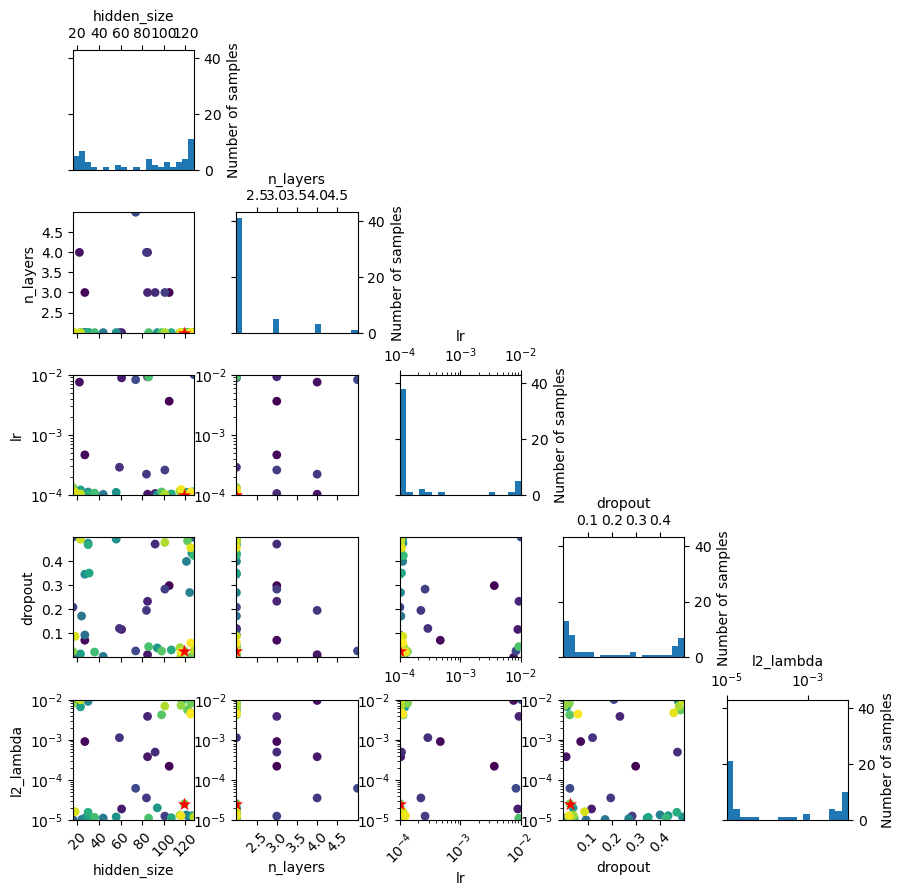

<Figure size 1600x1200 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
from skopt.plots import plot_evaluations, plot_objective

def plot_resultados_avaliacao_sk(result):
    """
    Plota os resultados da otimização Bayesiana usando as funções plot_evaluations e plot_objective do scikit-optimize.

    Args:
        result: Objeto retornado pela função gp_minimize.
    """

    # Plota as avaliações dos hiperparâmetros
    _ = plot_evaluations(result)

    # Define o tamanho da figura com Matplotlib
    plt.figure(figsize=(16, 12))  # Define o tamanho da figura antes de chamar plot_evaluations

    plt.show()

def plot_resultados_otimizacao_sk(result, **kwargs):
    """
    Plota os resultados da otimização Bayesiana usando a função plot_objective do scikit-optimize.

    Args:
        result: Objeto retornado pela função gp_minimize.
        **kwargs: Argumentos adicionais para a função plot_objective.
    """

    # Define o tamanho da figura com Matplotlib
    plt.figure(figsize=(16, 12))  # Define o tamanho da figura antes de chamar plot_objective

    # Plota a dependência parcial dos hiperparâmetros
    _ = plot_objective(result, **kwargs)  # Passa os argumentos adicionais para plot_objective
    plt.show()


# Chama a função para plotar os resultados
plot_resultados_avaliacao_sk(result)

### Interpretação visual geral:

Nos gráficos de dispersão gerados pelo plot_evaluations, as cores dos pontos representam o valor da função objetivo para cada combinação de hiperparâmetros avaliada durante a otimização Bayesiana. Neste caso, a função objetivo é a acurácia de validação, que se deseja maximizar.

- Cores mais escuras: Indicam valores menores da função objetivo, ou seja, pior acurácia de validação.
- **Cores mais claras**:  Indicam valores maiores da função objetivo, ou seja, **melhor acurácia de validação**.

Observando os gráficos, foi possível identificar as regiões do espaço de busca que levam a um melhor desempenho (cores mais claras) e as regiões com pior desempenho (cores mais escuras).

Por exemplo, no gráfico hidden_size vs. n_layers, foi possível notar que os pontos mais claros (melhor acurácia) tendem a se concentrar em valores intermediários de hidden_size e um número menor de camadas.

### Interpretação dos Gráficos da diagonal principal:

**hidden_size**: Mostra a distribuição dos valores de hidden_size (número de features ocultas) avaliados durante a otimização. Observa-se que a maioria dos valores testados se concentra entre 20 e 120, com alguns outliers.

**n_layers**: Indica que o otimizador explorou mais as configurações com 2 e 3 camadas ocultas, com poucas avaliações para 4 e 5 camadas.

**lr (taxa de aprendizado)**: A maioria dos valores de lr testados está concentrada em torno de 1e-4 e 1e-3, com poucas avaliações para valores maiores.

**dropout**: O otimizador explorou valores de dropout em todo o intervalo definido (0.0 a 0.5), com uma concentração maior em valores menores.

**l2_lambda (peso da regularização L2)**: A maioria dos valores testados para l2_lambda está concentrada em torno de 1e-5 e 1e-4, com poucas avaliações para valores maiores.

### Interpretação dos Gráficos fora da diagonal principal:

**Dispersão**: Cada ponto representa uma avaliação da função objetivo (acurácia de validação) para uma combinação específica de hiperparâmetros. A cor do ponto indica o valor da função objetivo (mais escuro = melhor desempenho).

**Relações entre hiperparâmetros**: Os gráficos de dispersão ajudam a identificar possíveis relações entre os hiperparâmetros. Por exemplo, no gráfico hidden_size vs. n_layers, podemos observar que alguns dos melhores resultados (pontos mais escuros) foram obtidos com valores maiores de hidden_size e um número menor de camadas.

### Interpretação no contexto do GKAN:

**Número de camadas e features ocultas:** A exploração de diferentes valores para hidden_size e n_layers é crucial para encontrar a arquitetura ideal do GKAN para o dataset Cora. O otimizador parece ter encontrado boas soluções com um número moderado de camadas e um número variável de features ocultas.

**Taxa de aprendizado:** A concentração de valores de lr em torno de 1e-4 e 1e-3 sugere que o modelo é sensível à taxa de aprendizado, e valores muito altos podem levar a instabilidade no treinamento.

**Dropout**: A exploração de diferentes valores de dropout indica que essa técnica de regularização pode ter um impacto significativo no desempenho do modelo.

**Regularização L2**: A concentração de valores de l2_lambda em torno de 1e-5 e 1e-4 sugere que a regularização L2 é importante para evitar overfitting, mas valores muito altos podem prejudicar o aprendizado.

## Visualização dos gráficos de otimização da função objetivo

As linhas vermelhas tracejadas nos subplots do plot_objective representam os valores dos hiperparâmetros que minimizam a função objetivo, ou seja, os valores que levam ao melhor desempenho do modelo no conjunto de validação.

Neste caso, como a função objetivo é a acurácia de validação negativa, a linha vermelha indica o valor do hiperparâmetro que maximiza a acurácia de validação.

Por exemplo, no subplot dropout vs. l2_lambda, a linha vermelha vertical indica o valor ideal de dropout (aproximadamente 0.25), enquanto a linha vermelha horizontal indica o valor ideal de l2_lambda (aproximadamente 10⁻⁴).

Interpretação:

Ponto de mínimo/máximo: A interseção das linhas vermelhas indica o ponto de mínimo (ou máximo, neste caso) da função objetivo no espaço bidimensional dos dois hiperparâmetros.
Influência dos hiperparâmetros: A posição das linhas vermelhas em relação aos eixos indica a influência de cada hiperparâmetro no desempenho do modelo. Se a linha vermelha estiver próxima ao centro do eixo, significa que o hiperparâmetro tem pouca influência no desempenho. Se a linha estiver próxima a um dos extremos do eixo, significa que o hiperparâmetro tem grande influência.

<Figure size 1600x1200 with 0 Axes>

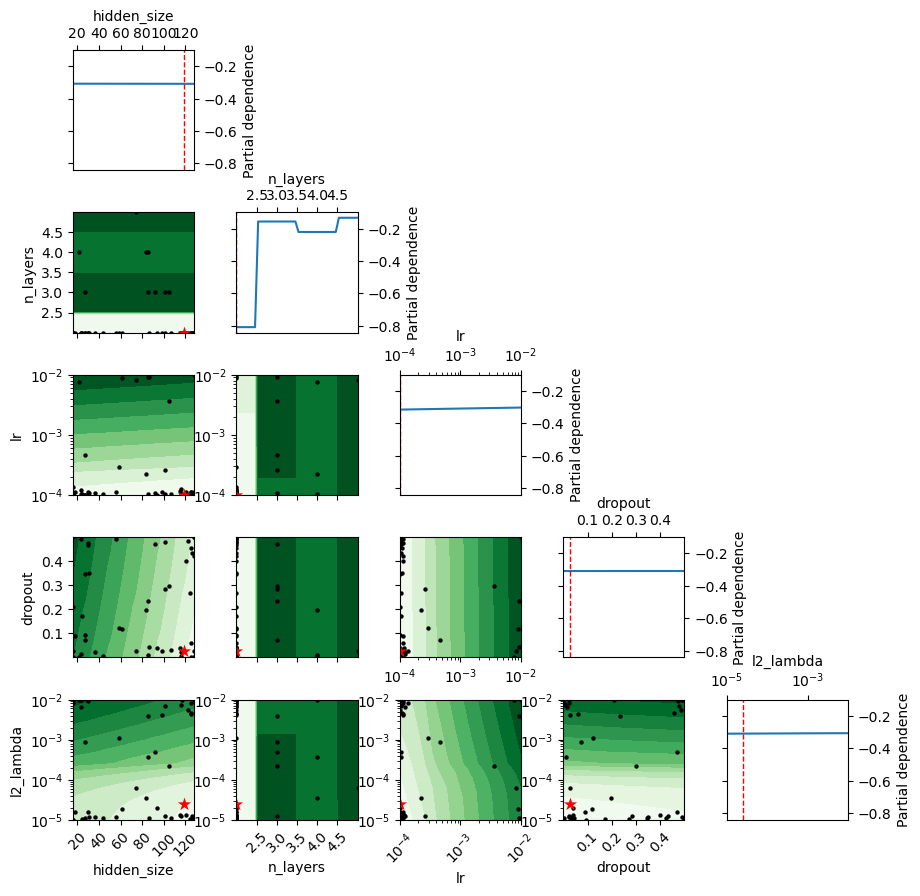

In [23]:
# Chama a função para plotar os resultados
plot_resultados_otimizacao_sk(result, cmap='Greens')

### Gráficos da diagonal principal: 

    Mostram a dependência parcial da função objetivo em relação a cada hiperparâmetro.

**hidden_size**: A acurácia aumenta com o hidden_size até cerca de 80, depois se estabiliza ou diminui ligeiramente.

**n_layers**: O modelo tem melhor desempenho com 2 camadas, com a acurácia diminuindo para 3 ou mais camadas.

**lr**: A taxa de aprendizado ideal parece estar em torno de 10⁻³. Taxas maiores ou menores resultam em pior acurácia.
dropout: O gráfico sugere que o dropout não tem um impacto significativo na acurácia dentro do intervalo testado.

**l2_lambda**: A regularização L2 parece ter um efeito positivo na acurácia, com valores em torno de 10⁻⁴ sendo os melhores.

### Gráficos fora da diagonal:

    Mostram a interação entre pares de hiperparâmetros. As cores representam a acurácia de validação (cores mais claras indicam melhor desempenho).

**hidden_size vs. n_layers**: O gráfico mostra que a melhor acurácia é obtida com 2 camadas e um hidden_size em torno de 80.

**lr vs. outros hiperparâmetros**: A taxa de aprendizado ideal parece ser consistente em torno de 10⁻³, independentemente dos outros hiperparâmetros.

**dropout vs. outros hiperparâmetros**: Confirma a pouca influência do dropout no desempenho do modelo.

**l2_lambda vs. outros hiperparâmetros**: Valores moderados de l2_lambda (em torno de 10⁻⁴) geralmente levam a melhor acurácia.

### Interpretação no contexto do GKAN:

**Arquitetura do modelo**: O gráfico hidden_size vs. n_layers sugere que um modelo GKAN mais raso (2 camadas) com um número moderado de features ocultas (em torno de 80) é mais eficaz para o dataset Cora.

**Taxa de aprendizado**: A taxa de aprendizado ideal (10⁻³) é consistente com valores comuns para otimizadores como Adam.

**Regularização**: A regularização L2 parece ser mais importante que o dropout para evitar overfitting neste caso.


Esses gráficos forneceram uma visão geral do espaço de busca e das interações entre os hiperparâmetros. Embora o modelo de otimização Bayesiana usado pelo skopt seja uma aproximação, podendo haver outras regiões do espaço de busca com bom desempenho que não foram exploradas, ao analisar esses gráficos em conjunto com as métricas de desempenho e as curvas de aprendizado foi possível obter uma compreensão completa do modelo.

Com base nesses gráficos e nas análises anteriores, foram ajustados o espaço de busca da otimização Bayesiana, focando nas regiões mais promissoras e refinando a busca pelos melhores hiperparâmetros para o modelo GKAN no dataset Cora.

O plot_objective forneceu uma visualização da busca por otimizar a função objetivo (acurácia de validação, neste caso) em relação a cada hiperparâmetro individualmente e em pares. Isso ajudou a entender como cada hiperparâmetro e suas interações afetam o desempenho do modelo GKAN no dataset Cora. A seguir a síntese da análise dos gráficos é descrita:

## Gráficos personalizados com Pyplot

In [24]:
## Gráficos personalizados com Plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

param_names = ['hidden_size', 'n_layers', 'lr', 'dropout', 'l2_lambda']

def plot_dependencia_hiperparametro_acuracia(result, param_index, param_name):
    """
    Plota a dependência parcial de um hiperparâmetro em relação à acurácia.

    Args:
        result: Objeto retornado pela função `gp_minimize`.
        param_index: Índice do hiperparâmetro na lista de parâmetros.
        param_name: Nome do hiperparâmetro.
    """

    # Extrai os valores do hiperparâmetro e da acurácia
    x_values = [p[param_index] for p in result.x_iters]
    y_values = [-r for r in result.func_vals]

    # Calcula a média da acurácia para cada valor único do hiperparâmetro
    unique_x = np.unique(x_values)
    mean_y_values = [np.mean([y for x, y in zip(x_values, y_values) if x == ux]) for ux in unique_x]

    # Encontra o índice do melhor valor
    best_idx = np.argmax(mean_y_values)

    # Cria o gráfico
    fig = go.Figure()

    # Plota todos os pontos de dados
    fig.add_trace(go.Scatter(
        x=x_values,
        y=y_values,
        mode='markers',
        marker=dict(
            color=y_values,
            colorscale='RdYlGn',
            colorbar=dict(title='Acurácia de Validação'),
            symbol='circle',
            size=6,
        ),
        showlegend=False
    ))

    # Plota a linha com a média dos valores
    fig.add_trace(go.Scatter(
        x=unique_x,
        y=mean_y_values,
        mode='lines+markers',
        line=dict(color='gray', dash='dash'),  # Linha tracejada em preto
        marker=dict(
            color=mean_y_values,
            colorscale='RdYlGn',
            symbol=['diamond' if i == best_idx else 'circle' for i in range(len(unique_x))],
            size=[10 if i == best_idx else 6 for i in range(len(unique_x))],
            line=dict(color='green', width=2)  # Borda verde para o melhor valor
        ),
        showlegend=False
    ))

    # Adiciona anotação para o ponto de destaque
    x_annotation = unique_x[best_idx]
    if param_name in ['lr', 'l2_lambda']:
        x_annotation = np.log10(x_annotation)  # Converte para escala logarítmica se necessário

    # Formata o texto da anotação em notação científica se o valor for muito pequeno
    if x_annotation < 1e-3:
        text_annotation = f'({unique_x[best_idx]:.1e}, {mean_y_values[best_idx]:.4f})'
    else:
        text_annotation = f'({unique_x[best_idx]:.4f}, {mean_y_values[best_idx]:.4f})'

    fig.add_annotation(
        x=x_annotation,
        y=mean_y_values[best_idx],
        xref='x',  # Referencia o eixo x do gráfico
        yref='y',
        text=text_annotation,
        showarrow=True,
        arrowhead=2,
        ax=20,
        ay=-30
    )

    # Configura o layout do gráfico
    fig.update_layout(
        title=f'Dependência Parcial do {param_name}',
        xaxis_title=param_name,
        yaxis_title='Acurácia de Validação',
        xaxis=dict(
            type='log' if param_name in ['lr', 'l2_lambda'] else 'linear',
            tickmode='linear',
            tick0=min(unique_x),
            dtick=(1 if param_name == 'n_layers' else 10 if param_name == 'hidden_size' else None)
        )
    )

    fig.show()

def plot_resultados_otimizacao(result, space, param_names):
    """
    Plota os resultados da otimização Bayesiana com Plotly.

    Args:
        result: Objeto retornado pela função `gp_minimize`.
        space: Lista de dimensões do espaço de busca.
        param_names: Lista de nomes dos hiperparâmetros.
    """

    # Cria a figura com subplots
    fig = make_subplots(rows=len(param_names), cols=len(param_names), 
                    shared_xaxes=False, shared_yaxes=False)

    # Itera sobre os pares de hiperparâmetros
    for i in range(len(param_names)):
        for j in range(i + 1):
            param1 = param_names[i]
            param2 = param_names[j]

            x_values = [p[i] for p in result.x_iters]
            y_values = [p[j] for p in result.x_iters]
            color_values = [-r for r in result.func_vals]

            # Encontra o índice do melhor valor
            best_idx = color_values.index(max(color_values))

            # Gráfico de linha para a diagonal principal
            if i == j:
                # Calcula a média da função objetivo para cada valor único do hiperparâmetro
                unique_x = np.unique(x_values)
                mean_color_values = [np.mean([c for x, c in zip(x_values, color_values) if x == ux]) for ux in unique_x]

                # Encontra o índice do melhor valor na diagonal principal
                best_idx_diag = mean_color_values.index(max(mean_color_values))

                # Cria o gráfico de linha
                fig.add_trace(
                    go.Scatter(
                        x=unique_x,
                        y=mean_color_values,
                        mode='lines+markers',  # Adiciona marcadores à linha
                        marker=dict(
                            color=mean_color_values,
                            colorscale='RdYlGn',
                            symbol=['circle'] * len(unique_x),
                            size=1
                        ),
                        showlegend=False
                    ),
                    row=i + 1,
                    col=j + 1
                )

                # Destaca o melhor valor com um losango
                fig.update_traces(
                    marker=dict(
                        symbol=['diamond' if k == best_idx_diag else 'circle' for k in range(len(unique_x))],
                        size=[15 if k == best_idx_diag else 6 for k in range(len(unique_x))],
                        line=dict(color='green', width=2)  # Destaca o ponto com borda verde
                    ),
                    row=i + 1,
                    col=j + 1
                )

                # Adiciona rótulo de dados para o ponto de destaque na diagonal
                fig.update_traces(
                    text=[f'({x:.4f}, {y:.4f})' if k == best_idx_diag else '' for k, (x, y) in enumerate(zip(unique_x, mean_color_values))],
                    textposition='top center',
                    row=i + 1,
                    col=j + 1
                )

            # Gráfico de dispersão para fora da diagonal
            else:
                # Cria o gráfico de dispersão
                fig.add_trace(
                    go.Scatter(
                        x=x_values,
                        y=y_values,
                        mode='markers',
                        marker=dict(
                            color=color_values,
                            colorscale='RdYlGn',
                            colorbar=dict(title='Acurácia de Validação'),
                            symbol=['circle'] * len(x_values)
                        ),
                        showlegend=False
                    ),
                    row=i + 1,
                    col=j + 1
                )

                # Destaca o melhor valor com um losango
                fig.update_traces(
                    marker=dict(
                        symbol=['diamond' if k == best_idx else 'circle' for k in range(len(x_values))],
                        size=[15 if k == best_idx else 6 for k in range(len(x_values))]
                    ),
                    row=i + 1,
                    col=j + 1
                )

            # Calcula os limites dos eixos com base nos dados do subplot (com margem extra)
            x_min = min(x_values)
            x_max = max(x_values)
            x_range = [x_min - 0.1 * (x_max - x_min), x_max + 0.1 * (x_max - x_min)]

            y_min = min(y_values)
            y_max = max(y_values)
            y_range = [y_min - 0.1 * (y_max - y_min), y_max + 0.1 * (y_max - y_min)]

            # Configura os títulos dos eixos e define o range individualmente
            if i == len(param_names) - 1:
                fig.update_xaxes(
                    title_text=param2, 
                    row=i + 1, 
                    col=j + 1, 
                    range=x_range,
                    showgrid=False,
                    type='log' if param2 in ['lr', 'l2_lambda'] else 'linear'
                )
            if j == 0:
                fig.update_yaxes(
                    title_text=param1, 
                    row=i + 1, 
                    col=j + 1, 
                    range=y_range,
                    showgrid=False,
                    type='log' if param1 in ['lr', 'l2_lambda'] else 'linear'
                )

    # Configura o layout da figura
    fig.update_layout(
        title='Comparação de Hiperparâmetros - Otimização Bayesiana',
        height=1500,
        width=1500
    )

    fig.show()

def plot_violin_hiperparametro_acuracia(result, param_index, param_name):
    """
    Plota um violin plot da acurácia de validação para o hiperparâmetro.

    Args:
        result: Objeto retornado pela função `gp_minimize`.
        param_index: Índice do hiperparâmetro na lista de parâmetros.
        param_name: Nome do hiperparâmetro.
    """

    # Extrai os valores do hiperparâmetro e da acurácia
    x_values = [p[param_index] for p in result.x_iters]
    y_values = [-r for r in result.func_vals]

    # Calcula a média da acurácia para cada valor único do hiperparâmetro
    unique_x = np.unique(x_values)
    mean_y_values = [np.mean([y for x, y in zip(x_values, y_values) if x == ux]) for ux in unique_x]

    # Encontra o índice do melhor valor
    best_idx = np.argmax(mean_y_values)

    # Cria o violin plot
    fig = go.Figure()
    fig.add_trace(go.Violin(
        x=x_values,
        y=y_values,
        box_visible=True,
        meanline_visible=True,
        points=False,  # Remove os pontos do violin plot
        jitter=0,      # Remove o jitter 
        opacity=0.6,
        name=param_name,
        showlegend=True
    ))

    # Plota os pontos individualmente com cores seguindo o colormap
    fig.add_trace(go.Scatter(
        x=x_values,
        y=y_values,
        mode='markers',
        marker=dict(
            color=y_values,
            colorscale='RdYlGn',
            symbol='circle',
            size=6,
        ),
        showlegend=False,
        name=param_name
    ))

    # Destaca o melhor valor com um diamante verde
    fig.add_trace(go.Scatter(
        x=[unique_x[best_idx]],
        y=[mean_y_values[best_idx]],
        mode='markers',
        marker=dict(
            color='green',
            symbol='diamond',
            size=15,  # Define o tamanho do marcador como 15
            line=dict(color='darkgreen', width=2)
        ),
        showlegend=False,
        name=f'Melhor {param_name}'
    ))

    # Adiciona anotação para o ponto de destaque
    x_annotation = unique_x[best_idx]
    if param_name in ['lr', 'l2_lambda']:
        x_annotation = np.log10(x_annotation)  # Converte para escala logarítmica se necessário

    # Formata o texto da anotação em notação científica se o valor for muito pequeno
    if x_annotation < 1e-3:
        text_annotation = f'({unique_x[best_idx]:.1e}, {mean_y_values[best_idx]:.4f})'
    else:
        text_annotation = f'({unique_x[best_idx]:.4f}, {mean_y_values[best_idx]:.4f})'

    fig.add_annotation(
        x=x_annotation,
        y=mean_y_values[best_idx],
        xref='x',
        yref='y',
        text=text_annotation,
        showarrow=True,
        arrowhead=2,
        ax=20,
        ay=-30
    )

    # Configura o layout do gráfico
    fig.update_layout(
        title=f'Distribuição da Acurácia para {param_name}',
        xaxis_title=param_name,
        yaxis_title='Acurácia de Validação',
        xaxis_type='log' if param_name in ['lr', 'l2_lambda'] else 'linear'  # Define o tipo de eixo x
    )

    # Ajusta o eixo x para mostrar ticks inteiros quando necessário
    if param_name == 'n_layers':
        fig.update_layout(
            xaxis=dict(
                tickmode='linear',
                tick0=min(x_values),
                dtick=1
            )
        )

    fig.show()



In [25]:
# Chama a função para plotar os resultados com plotly

# Lista de nomes dos hiperparâmetros
param_names = ['hidden_size', 'n_layers', 'lr', 'dropout', 'l2_lambda']

plot_resultados_otimizacao(result, space, param_names)

In [26]:
plot_dependencia_hiperparametro_acuracia(result, 0, 'hidden_size')
plot_dependencia_hiperparametro_acuracia(result, 1, 'n_layers')
plot_dependencia_hiperparametro_acuracia(result, 2, 'lr')
plot_dependencia_hiperparametro_acuracia(result, 3, 'dropout')
plot_dependencia_hiperparametro_acuracia(result, 4, 'l2_lambda')

In [27]:
# Plota os violin plots para cada hiperparâmetro
for i, param_name in enumerate(['hidden_size', 'n_layers', 'lr', 'dropout', 'l2_lambda']):
    plot_violin_hiperparametro_acuracia(result, i, param_name)

## Gráficos com Hiplot

In [ ]:
# %pip install hiplot
# %pip install --upgrade hiplot

In [ ]:
# import hiplot as hip

# def plot_hiplot_parallel(data):
#     """Plota os resultados da otimização Bayesiana com o HiPlot (gráfico paralelo)."""

#     xp = hip.Experiment.from_iterable(data)
#     xp.display_data(hip.Displays.PARALLEL_PLOT).update({
#         'options': {
#             'hide': ['uid', 'from_uid'],
#             'color_by': 'val_acc',
#             'zoom_on_brush': False
#         }
#     })
#     xp.display(force_full_width=True)

# # Dados para o HiPlot
# data = [{'hidden_size': int(p[0]),  # Converte para int
#          'n_layers': int(p[1]),      # Converte para int
#          'lr': float(p[2]),          # Converte para float
#          'dropout': float(p[3]),     # Converte para float
#          'l2_lambda': float(p[4]),   # Converte para float
#          'val_acc': -r} 
#         for p, r in zip(result.x_iters, result.func_vals)]

# # Plota o gráfico paralelo
# plot_hiplot_parallel(data)

# <b>Treinar modelo final hiperparâmetros otimizados</b>
    
    incluindo estratégias para evitar o overfitting com data augmentation e early stopping

In [28]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')

# Imprime os atributos do dataset
print(dataset._data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [29]:
# %pip install tabulate

In [30]:
dataset.get_summary()

/home/mak/miniconda3/envs/rapids-24.10/lib/python3.11/site-packages/torch_geometric/data/summary.py:34: UserWarning:

std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1823.)



Planetoid (#graphs=1):
+------------+----------+----------+
|            |   #nodes |   #edges |
|------------+----------+----------|
| mean       |     2708 |    10556 |
| std        |      nan |      nan |
| min        |     2708 |    10556 |
| quantile25 |     2708 |    10556 |
| median     |     2708 |    10556 |
| quantile75 |     2708 |    10556 |
| max        |     2708 |    10556 |
+------------+----------+----------+

In [31]:
def investigar_dataset(dataset):
  """
  Imprime informações sobre o dataset para ajudar na adaptação do dropout.

  Args:
      dataset: O dataset a ser investigado.
  """

  print("Informações sobre o dataset:")
  print(f"  Tipo: {type(dataset)}")
#   print(f"  Atributos: {dataset.keys()}")

  if hasattr(dataset, 'x'):
      print("  Informação sobre os nós:")
      print(f"    x: {dataset.x}")
      print(f"    Número de nós: {dataset.x.size(0)}")
      print(f"    Número de features por nó: {dataset.x.size(1)}")
  else:
      print("  O dataset não possui o atributo 'x'.")

  if hasattr(dataset, 'y'):
      print("  Informação sobre os rótulos:")
      print(f"    y: {dataset.y}")
      if hasattr(dataset.y, 'size'):
          print(f"    Tamanho de y: {dataset.y.size()}")
      print(f"    Número de classes: {len(set(dataset.y.tolist()))}")
  else:
      print("  O dataset não possui o atributo 'y'.")

  try:
    if hasattr(dataset, 'edge_index'):
        print("  Informação sobre as arestas:")
        print(f"    edge_index: {dataset.edge_index}")
        print(f"    Número de arestas: {dataset.edge_index.size(1)}")
        # print(f"    Número de nós: {dataset.num_nodes}")
        # grau_medio = (dataset.edge_index.size(1) / dataset.num_nodes)
        # print(f"    Grau médio dos nós: {grau_medio:.2f}")
    else:
        print("  O dataset não possui o atributo 'edge_index'.")
  except Exception as e:
        print(e)

  # Adicione outras informações relevantes para o seu problema aqui

# Chama a função para investigar o dataset
investigar_dataset(dataset)

Informações sobre o dataset:
  Tipo: <class 'torch_geometric.datasets.planetoid.Planetoid'>
  Informação sobre os nós:
    x: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
    Número de nós: 2708
    Número de features por nó: 1433
  Informação sobre os rótulos:
    y: tensor([3, 4, 4,  ..., 3, 3, 3])
    Tamanho de y: torch.Size([2708])
    Número de classes: 7
  Informação sobre as arestas:
    edge_index: tensor([[ 633, 1862, 2582,  ...,  598, 1473, 2706],
        [   0,    0,    0,  ..., 2707, 2707, 2707]])
    Número de arestas: 10556


In [32]:
# Verifica se o dataset possui o atributo edge_index
if hasattr(dataset, 'edge_index'):
    print("O dataset possui o atributo edge_index.")
    print(dataset.edge_index)  # Imprime o edge_index para verificar se é um tensor válido
else:
    print("O dataset NÃO possui o atributo edge_index.")

O dataset possui o atributo edge_index.
tensor([[ 633, 1862, 2582,  ...,  598, 1473, 2706],
        [   0,    0,    0,  ..., 2707, 2707, 2707]])


In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Chama a função gp_minimize() para otimização de hiperparâmetros
try:
    # Chama a função gp_minimize() com os argumentos adicionais para evitar overfitting
    result = gp_minimize(
        lambda params: objective(params, feat, adj, label, trn_mask, val_mask, tst_mask),
        space,
        n_calls=50,
        random_state=args.seed
    )
except Exception as e:
    print(f"Erro na otimização Bayesiana: {e}")
    result = None

# --- Define a função calculate_metrics ---
def calculate_metrics(label, pred, tst_mask):
    # Calcula a matriz de confusão
    conf_matrix = confusion_matrix(label[tst_mask].cpu().numpy(), pred[tst_mask].argmax(dim=-1).cpu().numpy())

    # Calcula a precisão, recall e F1-score para cada classe (com zero_division=0)
    precision = precision_score(label[tst_mask].cpu().numpy(), 
                                pred[tst_mask].argmax(dim=-1).cpu().numpy(), 
                                average=None, 
                                zero_division=0)  # Adiciona zero_division=0
    recall = recall_score(label[tst_mask].cpu().numpy(), pred[tst_mask].argmax(dim=-1).cpu().numpy(), average=None)
    f1 = f1_score(label[tst_mask].cpu().numpy(), pred[tst_mask].argmax(dim=-1).cpu().numpy(), average=None)

    # Calcula a precisão, recall e F1-score médias (macro average)
    macro_precision = precision_score(label[tst_mask].cpu().numpy(), 
                                        pred[tst_mask].argmax(dim=-1).cpu().numpy(), 
                                        average='macro', 
                                        zero_division=0)
    macro_recall = recall_score(label[tst_mask].cpu().numpy(), pred[tst_mask].argmax(dim=-1).cpu().numpy(), average='macro')
    macro_f1 = f1_score(label[tst_mask].cpu().numpy(), pred[tst_mask].argmax(dim=-1).cpu().numpy(), average='macro')

    # Imprime os resultados
    print("Matriz de Confusão:")
    print(conf_matrix)
    print("\nPrecisão por classe:", np.round(precision,4))
    print("  Recall por classe:", np.round(recall,4))
    print("F1-score por classe:", np.round(f1,4))
    print("\nPrecisão média (macro):", np.round(macro_precision,4))
    print("  Recall médio (macro):", np.round(macro_recall,4))
    print("F1-score médio (macro):", np.round(macro_f1,4))
# --- Fim da definição da função calculate_metrics ---

# Verifica se a otimização foi bem-sucedida
if result is not None:
    # Imprime os melhores hiperparâmetros encontrados
    print("Melhores hiperparâmetros:", result.x)

    # Extrai os melhores hiperparâmetros do resultado da otimização
    best_params = {
        'hidden_size': result.x[0],
        'n_layers': result.x[1],
        'lr': result.x[2],
        'dropout': result.x[3],
        'l2_lambda': result.x[4]
    }

    # Cria o modelo final com os melhores hiperparâmetros
    model = gkan.GKAN(
        in_feat=in_feat,
        hidden_feat=best_params['hidden_size'],
        out_feat=out_feat,
        grid_feat=args.grid_size,
        num_layers=best_params['n_layers'],
        use_bias=False,
    ).to(args.device)  # type: ignore

    # Treina o modelo final com os melhores hiperparâmetros (incluindo early stopping)
    optimizer = torch.optim.Adam(model.parameters(), lr=best_params['lr'])

    best_val_loss = float('inf')
    patience = 10
    epochs_without_improvement = 0

    # Listas para armazenar as métricas
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(args.epochs):
        model.train()
        optimizer.zero_grad()
        
        try:
            out = model(feat, adj)
        except Exception as e:
            print(f"Erro na inferência do modelo: {e}")
            break

        pred, true = out[trn_mask], label[trn_mask]
        loss = F.nll_loss(pred, true)

        # Regularização L2
        l2_reg = torch.tensor(0.).to(args.device)  # type: ignore
        for param in model.parameters():
            l2_reg += torch.norm(param)
        loss = loss + best_params['l2_lambda'] * l2_reg

        acc = int((pred.argmax(dim=-1) == true).sum()) / int(trn_mask.sum())

        try:
            loss.backward()
            optimizer.step()
        except Exception as e:
            print(f"Erro no backpropagation: {e}")
            break

        # Avaliação na validação
        model.eval()
        with torch.no_grad():
            try:
                pred = model(feat, adj)
            except Exception as e:
                print(f"Erro na inferência do modelo (validação): {e}")
                break

            val_loss = F.nll_loss(pred[val_mask], label[val_mask]).item()
            val_acc = int((pred[val_mask].argmax(dim=-1) == label[val_mask]).sum()) / int(val_mask.sum())

        # Armazenar as métricas
        train_losses.append(loss.item())
        train_accuracies.append(acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
                print(f"Early stopping na época {epoch}")
                break

    # Avalia o modelo final no conjunto de teste
    model.eval()
    with torch.no_grad():
        try:
            pred = model(feat, adj)
        except Exception as e:
            print(f"Erro na inferência do modelo (teste): {e}")
        else:
            # Calcula as métricas no conjunto de teste
            calculate_metrics(label, pred, tst_mask)

            test_acc = int((pred[tst_mask].argmax(dim=-1) == label[tst_mask]).sum()) / int(tst_mask.sum())
            print(f'Acurácia no teste: {test_acc:.4f}')

            # Plotagem das curvas de desempenho com Plotly
            # fig = go.Figure()

            # fig.add_trace(go.Scatter(y=train_losses, mode='lines', name='Train Loss'))
            # fig.add_trace(go.Scatter(y=train_accuracies, mode='lines', name='Train Accuracy'))
            # fig.add_trace(go.Scatter(y=val_losses, mode='lines', name='Validation Loss'))
            # fig.add_trace(go.Scatter(y=val_accuracies, mode='lines', name='Validation Accuracy'))

            # fig.update_layout(
            #     title='Curvas de Desempenho - Otimização Bayesiana',
            #     xaxis_title='Avaliação',
            #     yaxis_title='Valor',
            # )

            # fig.show()

Melhores hiperparâmetros: [16, 2, 0.00010242516724077738, 0.2731506180695563, 1.7527224936000365e-05]
Early stopping na época 128
Matriz de Confusão:
[[ 96   2   1   4   9   6   1]
 [  6  58   3  13   2   2   1]
 [  1   3 148   7   1   4   1]
 [  5   8  10 258  21   7   1]
 [ 12   1   0  11 117   2   0]
 [  5   1   7   5   5  74  10]
 [  9   0   3   3   2   0  54]]

Precisão por classe: [0.7164 0.7945 0.8605 0.8571 0.7452 0.7789 0.7941]
  Recall por classe: [0.8067 0.6824 0.897  0.8323 0.8182 0.6916 0.7606]
F1-score por classe: [0.7589 0.7342 0.8783 0.8445 0.78   0.7327 0.777 ]

Precisão média (macro): 0.7924
  Recall médio (macro): 0.7841
F1-score médio (macro): 0.7865
Acurácia no teste: 0.8050


In [41]:
import plotly.graph_objects as go

def plot_training_evaluation(train_losses, train_accuracies, val_losses, val_accuracies):
    """
    Plota as curvas de perda e acurácia de treinamento e validação de uma rede neural.

    Args:
      train_losses: Lista com os valores de perda de treinamento.
      train_accuracies: Lista com os valores de acurácia de treinamento.
      val_losses: Lista com os valores de perda de validação.
      val_accuracies: Lista com os valores de acurácia de validação.
    
    Função de perda:
    A função de perda utilizada é a Negative Log Likelihood Loss: F.nll_loss()

    Essa função é utilizada em problemas de classificação, especialmente quando a saída do modelo passa por uma função de softmax, que gera uma distribuição de probabilidade para cada classe. A Negative Log Likelihood Loss não possui uma unidade específica, sendo um valor adimensional. Ela mede a diferença entre a distribuição de probabilidade prevista pelo modelo e a verdadeira distribuição das classes.    
    """

    # Cria o gráfico com Plotly
    fig = go.Figure()

    # Adiciona as curvas de perda no eixo principal (esquerdo)
    fig.add_trace(go.Scatter(x=list(range(len(train_losses))), y=train_losses, 
                             mode='lines', name='Train Loss', yaxis='y1', line=dict(dash='dash')))
    fig.add_trace(go.Scatter(x=list(range(len(val_losses))), y=val_losses, 
                             mode='lines', name='Validation Loss', yaxis='y1'))

    # Adiciona as curvas de acurácia no eixo secundário (direito)
    fig.add_trace(go.Scatter(x=list(range(len(train_accuracies))), y=train_accuracies, 
                             mode='lines', name='Train Accuracy', yaxis='y2', line=dict(dash='dash')))
    fig.add_trace(go.Scatter(x=list(range(len(val_accuracies))), y=val_accuracies, 
                             mode='lines', name='Validation Accuracy', yaxis='y2'))

    # Configura o eixo principal (esquerdo)
    fig.update_layout(
        yaxis=dict(
            title='Perda',
            titlefont=dict(color="#1f77b4"),
            tickfont=dict(color="#1f77b4")
        )
    )

    # Configura o eixo secundário (direito)
    fig.update_layout(
        yaxis2=dict(
            title='Acurácia (%)',
            titlefont=dict(color="#ff7f0e"),
            tickfont=dict(color="#ff7f0e"),
            overlaying='y',
            side='right',
            tickformat=".0%"  # Formatação em percentual
        )
    )

    # Configura o layout do gráfico
    fig.update_layout(
        title='Curvas de Desempenho - Otimização Bayesiana',
        xaxis_title='Época',
        yaxis_title='Perda (Negative Log Likelihood)',  # Indica a função de perda
        width=1200,
        height=600,
        font=dict(size=14),
        legend=dict(x=0.8, y=0.1)  # Ajusta a posição da legenda
    )

    # Exibe o gráfico
    fig.show()

## Avaliar as métricas de desempenho do modelo final

In [36]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Calcula a matriz de confusão
conf_matrix = confusion_matrix(label[tst_mask].cpu().numpy(), pred[tst_mask].argmax(dim=-1).cpu().numpy())

# Calcula a precisão, recall e F1-score para cada classe
precision = precision_score(label[tst_mask].cpu().numpy(), pred[tst_mask].argmax(dim=-1).cpu().numpy(), average=None)
recall = recall_score(label[tst_mask].cpu().numpy(), pred[tst_mask].argmax(dim=-1).cpu().numpy(), average=None)
f1 = f1_score(label[tst_mask].cpu().numpy(), pred[tst_mask].argmax(dim=-1).cpu().numpy(), average=None)

# Calcula a precisão, recall e F1-score médias (macro average)
macro_precision = precision_score(label[tst_mask].cpu().numpy(), pred[tst_mask].argmax(dim=-1).cpu().numpy(), average='macro')
macro_recall = recall_score(label[tst_mask].cpu().numpy(), pred[tst_mask].argmax(dim=-1).cpu().numpy(), average='macro')
macro_f1 = f1_score(label[tst_mask].cpu().numpy(), pred[tst_mask].argmax(dim=-1).cpu().numpy(), average='macro')

# Imprime os resultados
print("Matriz de Confusão:")
print(conf_matrix)
print("\nPrecisão por classe:", np.round(precision,4))
print("Recall por classe:", np.round(recall,4))
print("F1-score por classe:", np.round(f1,4))
print("\nPrecisão média (macro):", np.round(macro_precision,4))
print("Recall médio (macro):", np.round(macro_recall,4))
print("F1-score médio (macro):", np.round(macro_f1,4))

Matriz de Confusão:
[[ 96   2   1   4   9   6   1]
 [  6  58   3  13   2   2   1]
 [  1   3 148   7   1   4   1]
 [  5   8  10 258  21   7   1]
 [ 12   1   0  11 117   2   0]
 [  5   1   7   5   5  74  10]
 [  9   0   3   3   2   0  54]]

Precisão por classe: [0.7164 0.7945 0.8605 0.8571 0.7452 0.7789 0.7941]
Recall por classe: [0.8067 0.6824 0.897  0.8323 0.8182 0.6916 0.7606]
F1-score por classe: [0.7589 0.7342 0.8783 0.8445 0.78   0.7327 0.777 ]

Precisão média (macro): 0.7924
Recall médio (macro): 0.7841
F1-score médio (macro): 0.7865


In [ ]:
# Acessa o histórico de avaliações da função objetivo
loss_history = result.func_vals  # type: ignore
loss_history

array([-0.166, -0.142, -0.206, -0.226, -0.826, -0.136, -0.146, -0.85 ,
       -0.234, -0.14 , -0.83 , -0.13 , -0.826, -0.832, -0.82 , -0.846,
       -0.826, -0.798, -0.814, -0.8  , -0.804, -0.822, -0.85 , -0.828,
       -0.836, -0.834, -0.848, -0.818, -0.828, -0.842, -0.838, -0.792,
       -0.822, -0.852, -0.81 , -0.808, -0.818, -0.834, -0.836, -0.824,
       -0.784, -0.836, -0.832, -0.814, -0.83 , -0.82 , -0.834, -0.83 ,
       -0.8  , -0.836])

In [42]:
plot_training_evaluation(train_losses, train_accuracies, val_losses, val_accuracies)